In [3]:

# rebin = 5
# group_num = 1
# color = 'C0'

# fig, (ax1, ax2) = plt.subplots(
#     2, 1, figsize=(5.5, 3),
#     gridspec_kw={'height_ratios': [3, 1]},
#     sharex=True
#     )

# with ChangeDir('../'):

#     AllData.clear()
#     AllModels.clear()
#     Plot.device = '/null'
#     Xset.restore('data/results/fit_sim_medium_refl_20251119_163948_grp.xcm')
#     Plot.xAxis = 'keV'

#     Plot.setRebin(rebin, rebin)
#     Plot("eeufs ra")
#     energies = Plot.x(group_num, 1)
#     edeltas = Plot.xErr(group_num, 1)
#     rates = Plot.y(group_num, 1)
#     errors = Plot.yErr(group_num, 1)
#     foldedmodel = Plot.model(group_num)
#     dataLabels = Plot.labels(1)

#     en = list(map(float, Plot.x(group_num)))

#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
#     ax1.errorbar(
#         energies, rates, xerr=edeltas, yerr=errors,
#         fmt='.', alpha=.8, color=color, zorder=10
#     )
#     ax1.scatter(
#         energies, rates, color=color, s=1, zorder=10
#     )
#     # residLabels = Plot.labels(2)
#     # note that for matplotlib step plots we need an x-axis array
#     # which includes the start and end value for each bin
#     # and the y-axis has to be the same size with an extra value
#     # added equal to the value of the last bin
#     nE = len(energies)
#     stepenergies = list()
#     for i in range(nE):
#         stepenergies.append(energies[i] - edeltas[i])
#     stepenergies.append(energies[-1] + edeltas[-1])
#     foldedmodel.append(foldedmodel[-1])
#     resid = Plot.y(group_num, 2)
#     residerr = Plot.yErr(group_num, 2)

#     ax1.plot(
#         stepenergies, foldedmodel, color='lime', lw=1,
#         alpha=.8
#     )

#     ax1.set_xlabel(None)
#     ax1.set_xlim(.3, 11)
#     ax1.set_ylim(1e-7, 1e-4)
#     ax1.set_ylabel(r"кэВ$^{2}$")
#     ax1.set_ylabel(dataLabels[1], fontsize=8)
#     Plot.device = '/null'

#     residLabels = Plot.labels(2)
#     ax2.set_xscale('log')
#     ax2.set_xlabel(residLabels[0], fontsize=8)
#     ax2.set_ylabel(residLabels[1], fontsize=8)

#     ax2.errorbar(
#         energies, resid, xerr=edeltas, yerr=residerr, fmt='.',
#         color=color, alpha=.8
#         )
#     ax2.axhline(1, ls='-', color='lime', alpha=.4)
#     ax2.set_ylim(-1, 3)
#     ax2.set_xlim(.3, 10)
#     ax2.set_xlabel(dataLabels[1])

In [5]:
# model = Model("tbabs*powerlaw")

# # Set initial parameter values
# model.TBabs.nH.values = 0
# model.powerlaw.PhoIndex.values = 2
# model.powerlaw.norm.values = 1

# Fit.perform()
# Fit.error("2.706 2 100")

***

CompPS Version 4.00
Comptonization by Iterative Scattering Method
Poutanen & Svensson 1996
Questions: Juri Poutanen (juri.poutanen@oulu.fi)

Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re        

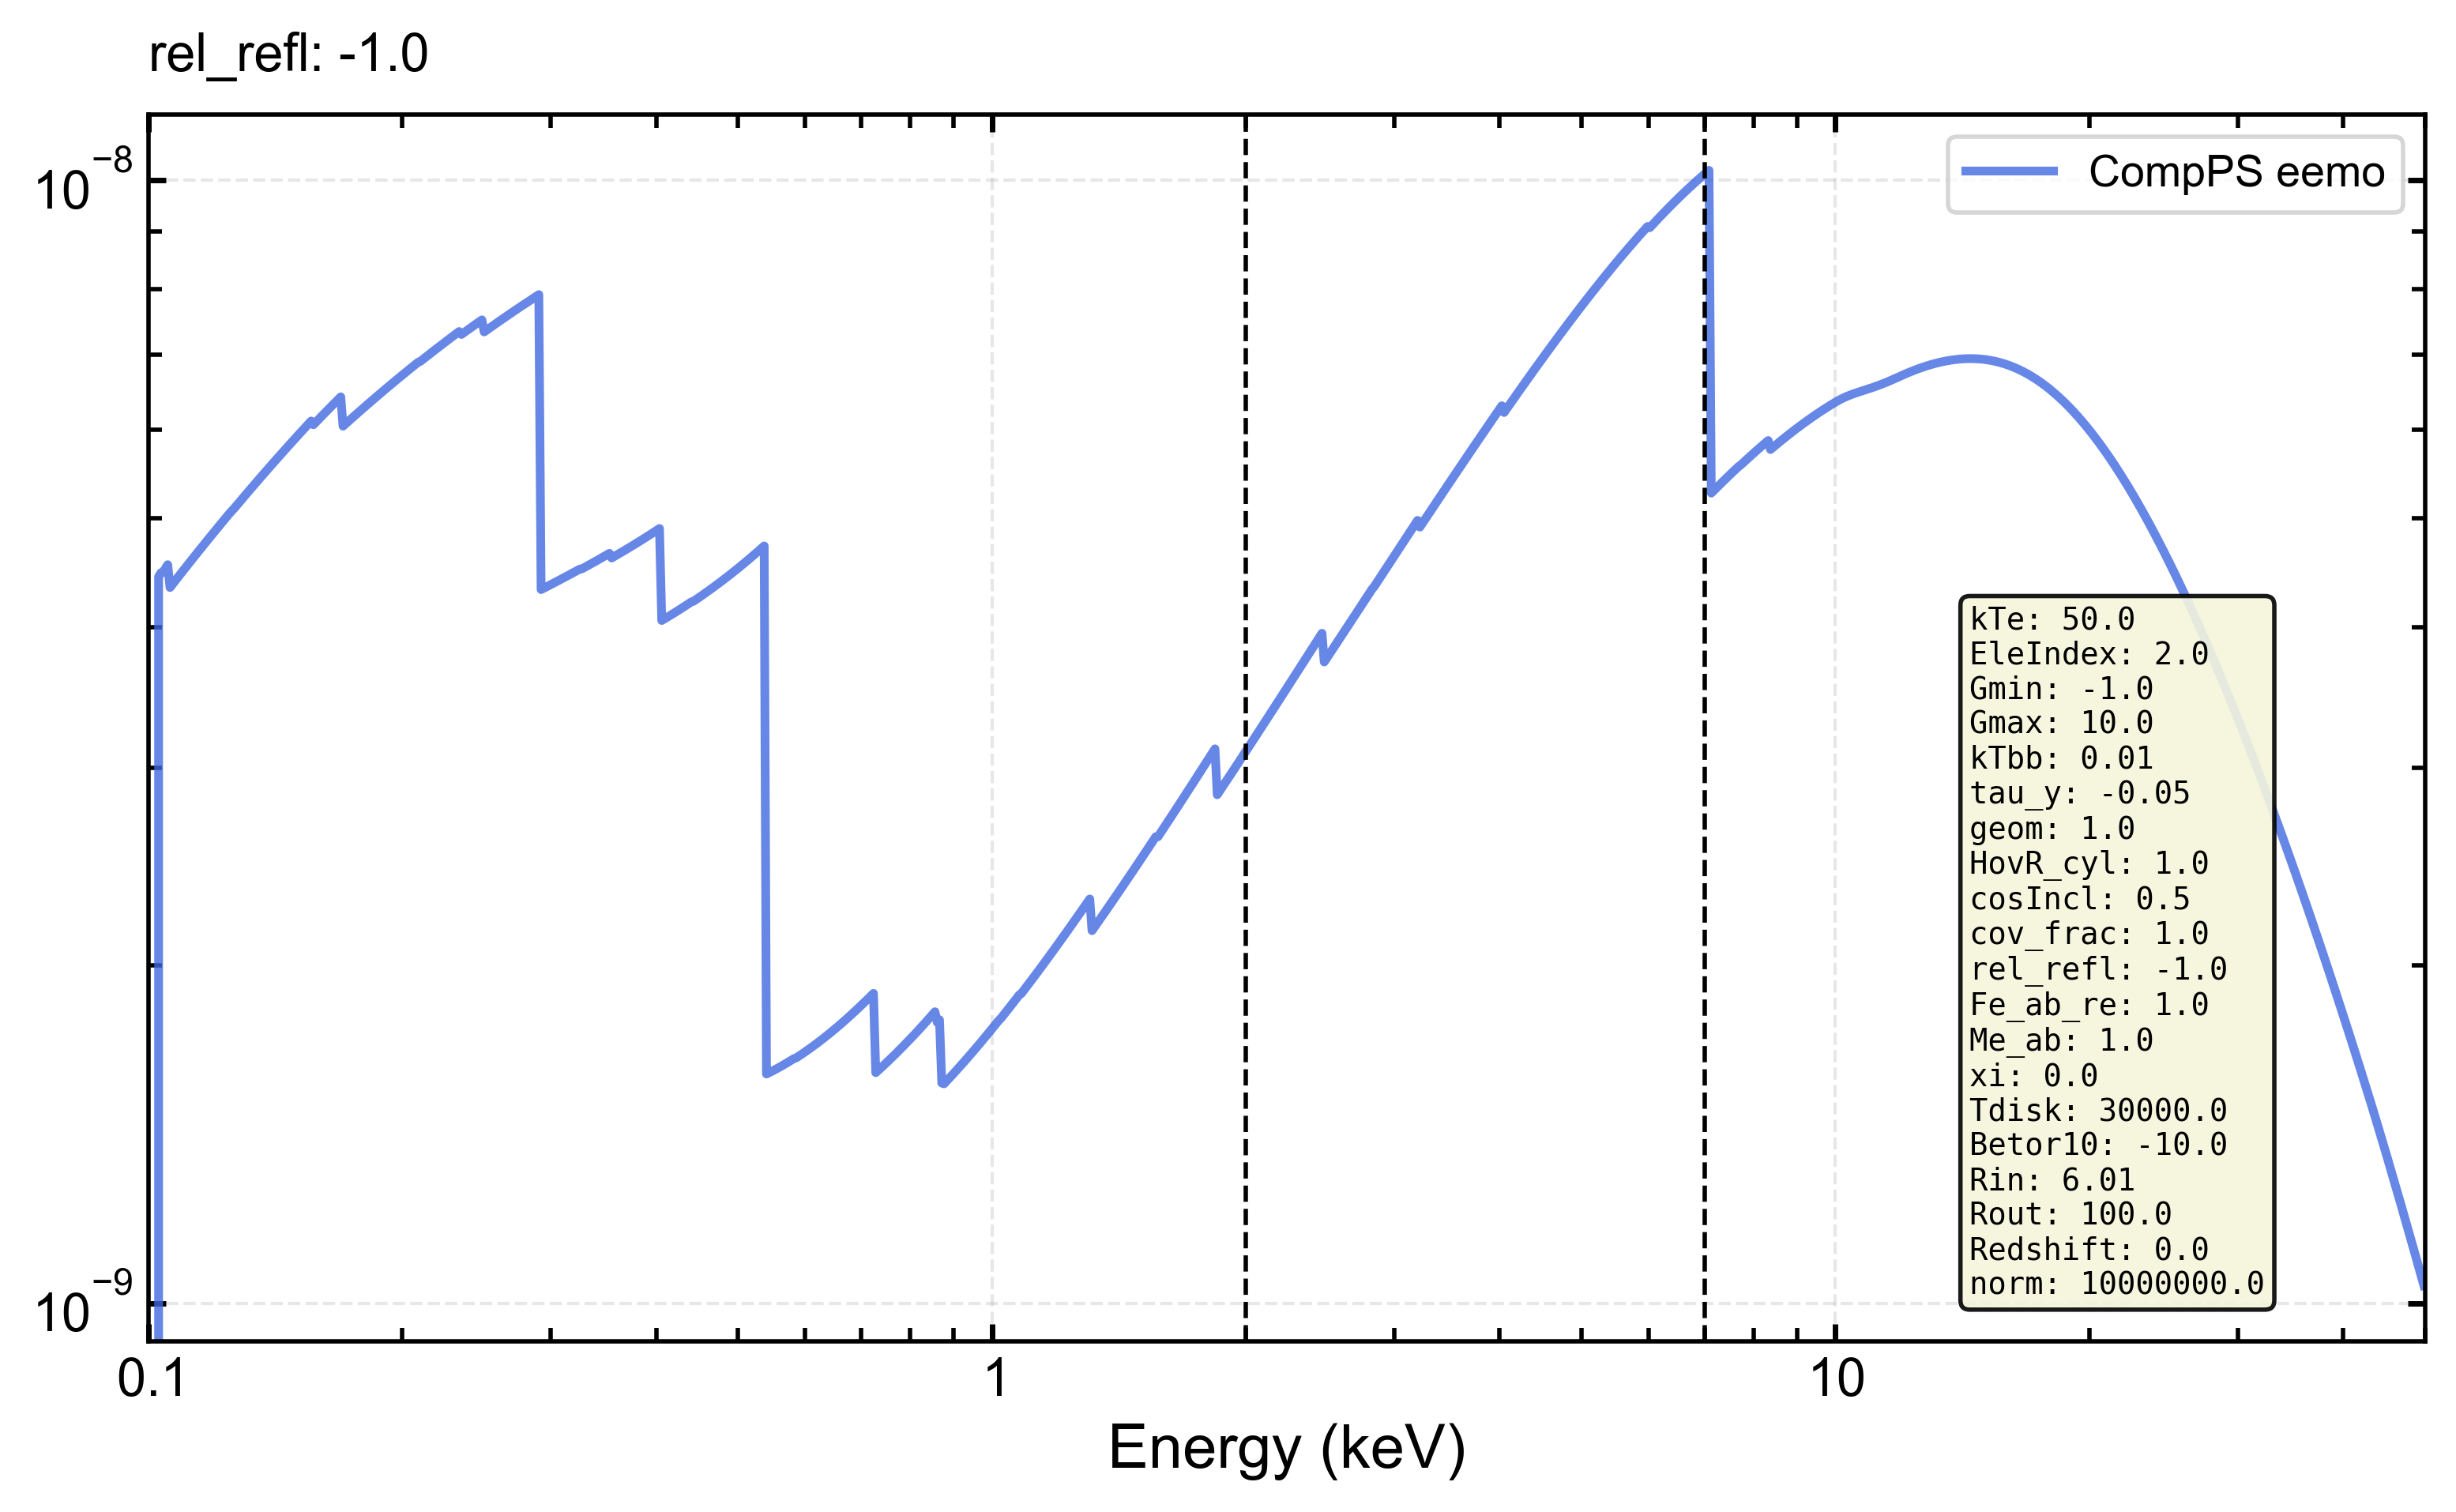

In [6]:
import matplotlib.pyplot as plt
from src.utils import ChangeDir
from xspec import AllData, AllModels, Xset, Plot, Fit, Model
import numpy as np
from src import plot_settings
from typing import Any
plot_settings.set_mpl()
%config InlineBackend.figure_format='retina'

# with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 50.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.05, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 1000, 10000]

# Generate the plot data with model components
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

# Extract the energy grid, components, and total model flux
en = list(map(float, Plot.x()))
total = list(map(float, Plot.model()))  # Total model


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                param_info.append(f'{param_name}: {param_value}')
                print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 50)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

rel_refl = AllModels(1).compPS.rel_refl.values[0]
ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()


Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       

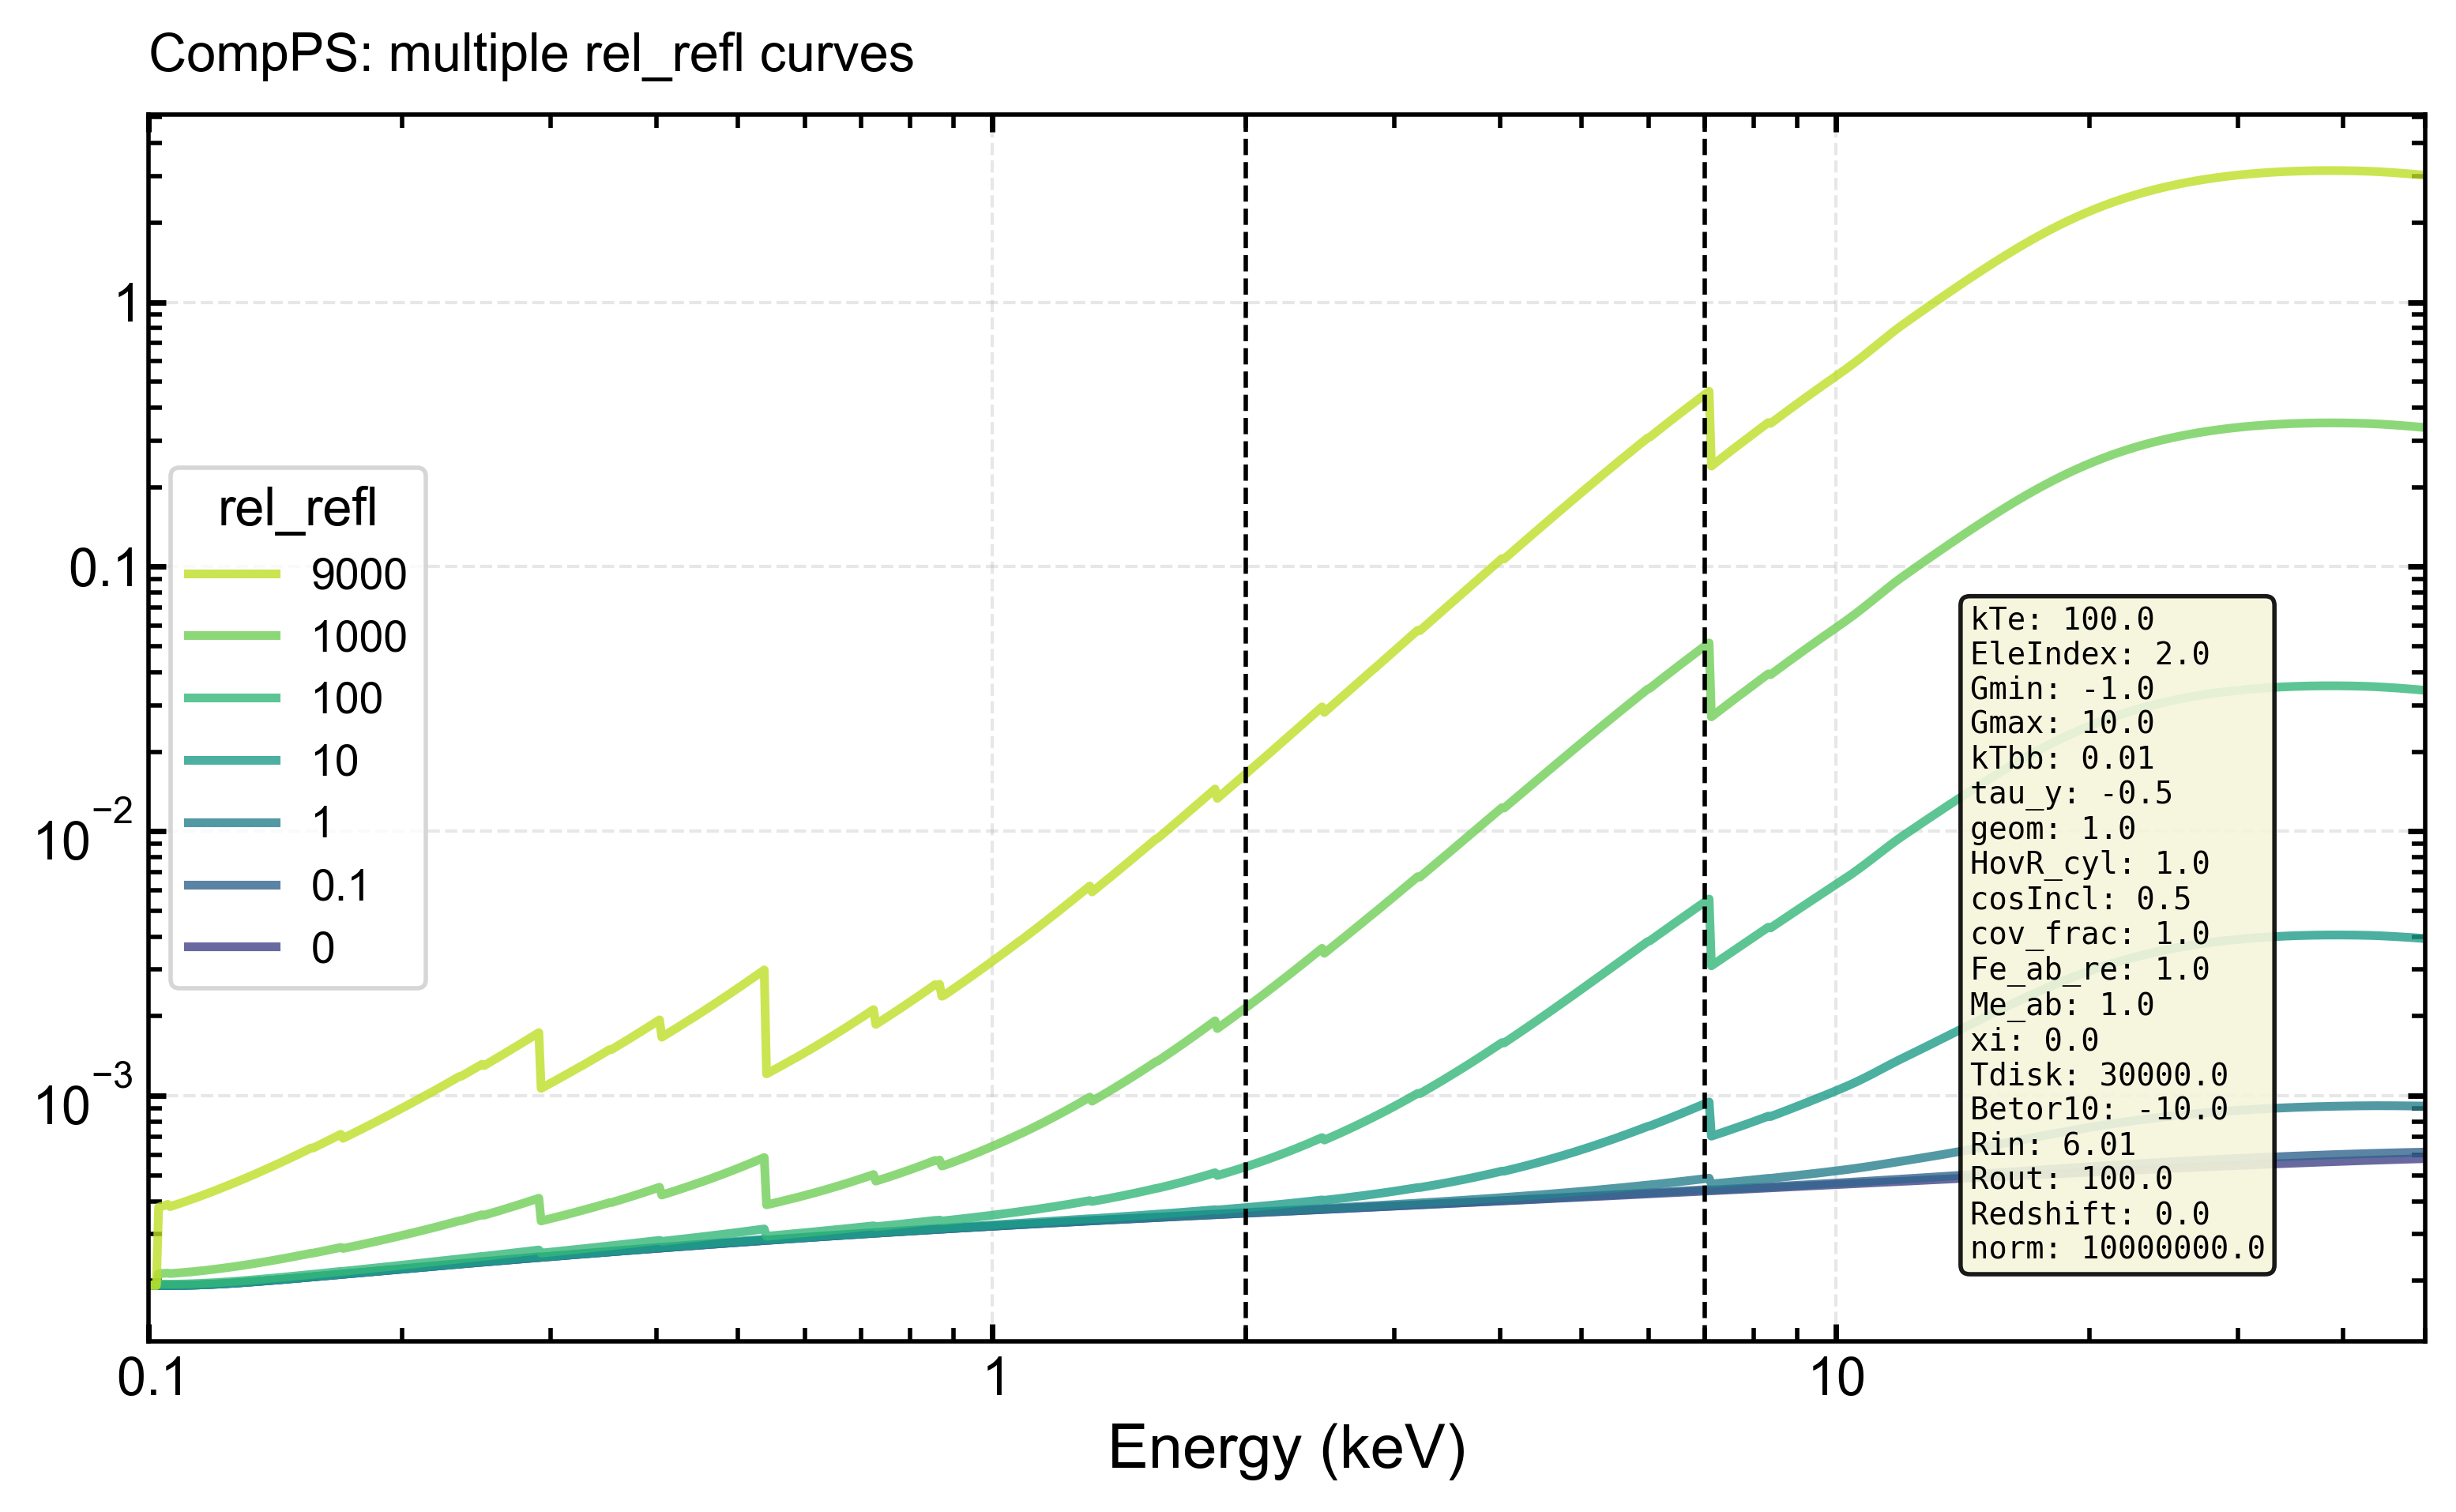

In [7]:
# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 10000, 10000]


rel_refl_curves = {}
for rel_refl_node in [0, 0.1, 1, 10, 100, 1000, 9000]:
        # Set rel_refl to the current node value
        compps.rel_refl = rel_refl_node

        # Generate the plot data with model components
        Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

        # Extract the energy grid, components, and total model flux
        en = list(map(float, Plot.x()))
        total = list(map(float, Plot.model()))  # Total model

        rel_refl_curves[rel_refl_node] = [en, total]


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                if param_name != 'rel_refl':
                        param_info.append(f'{param_name}: {param_value}')
                        print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

# Generate colors similar to grid_study_common.py
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(rel_refl_curves)))

# Plot each curve with a different color
for (rel_refl_node, (en, total)), color in zip(rel_refl_curves.items(), colors):
    ax.plot(
        en, total,
        label=f'{rel_refl_node}',
        alpha=0.8,
        color=color,
        lw=2,
        ls='-'
    )

ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(
        fontsize=10, reverse=True, loc='center left', title='rel_refl',
        title_fontsize=12
        )
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 50)
# ax.set_ylim(2e-4, 1)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

ax.set_title(f'CompPS: multiple rel_refl curves', fontsize=12, pad=10, loc='left')
# ax.set_title(f'tau_y = {compps.tau_y.values[0]}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()


Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       

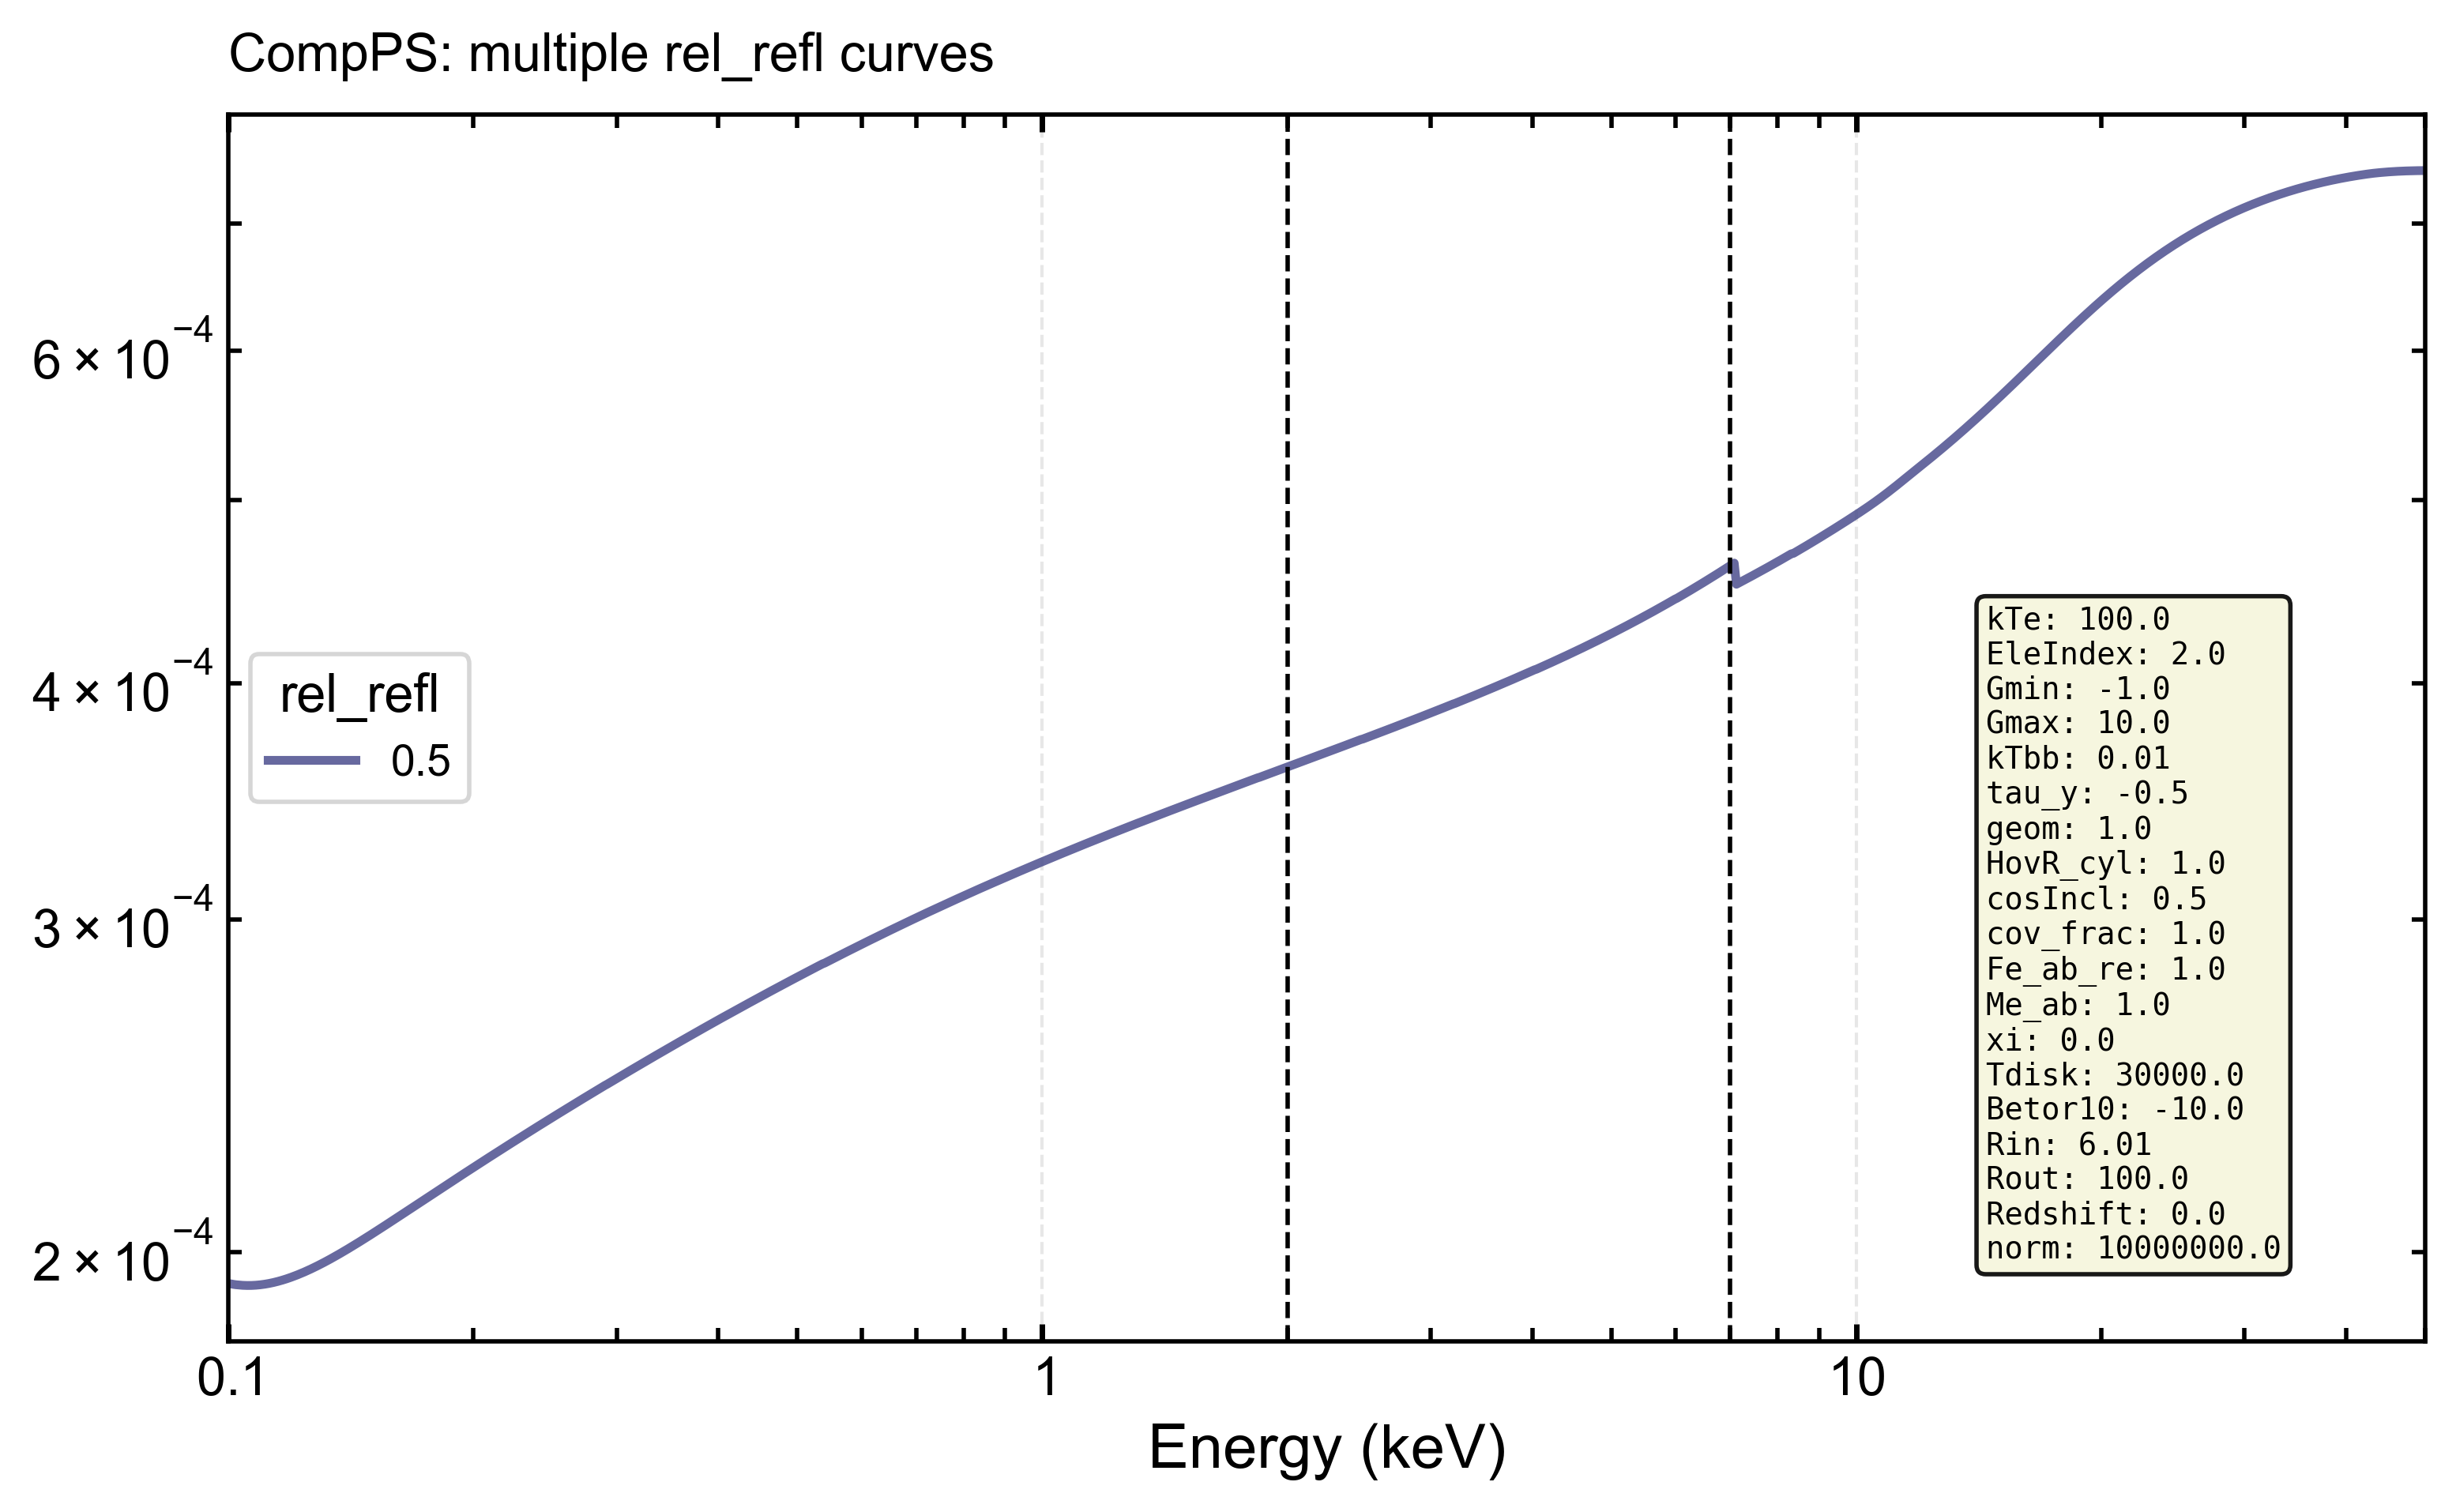

In [8]:
# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 10000, 10000]


rel_refl_curves = {}
for rel_refl_node in [0.5]:
        # Set rel_refl to the current node value
        compps.rel_refl = rel_refl_node

        # Generate the plot data with model components
        Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

        # Extract the energy grid, components, and total model flux
        en = list(map(float, Plot.x()))
        total = list(map(float, Plot.model()))  # Total model

        rel_refl_curves[rel_refl_node] = [en, total]


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                if param_name != 'rel_refl':
                        param_info.append(f'{param_name}: {param_value}')
                        print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

# Generate colors similar to grid_study_common.py
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(rel_refl_curves)))

# Plot each curve with a different color
for (rel_refl_node, (en, total)), color in zip(rel_refl_curves.items(), colors):
    ax.plot(
        en, total,
        label=f'{rel_refl_node}',
        alpha=0.8,
        color=color,
        lw=2,
        ls='-'
    )

ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(
        fontsize=10, reverse=True, loc='center left', title='rel_refl',
        title_fontsize=12
        )
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 50)
# ax.set_ylim(2e-4, 1)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

ax.set_title(f'CompPS: multiple rel_refl curves', fontsize=12, pad=10, loc='left')
# ax.set_title(f'tau_y = {compps.tau_y.values[0]}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()

 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
Parameter delta values for fits will now be 0.01 * parValue
 Model systematic error set to 0

Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      50.0000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                10.0000      frozen
   5    1   compPS     kTbb       keV      1.00000E-02  frozen
   6    1   compPS     tau_y               -0.500000    +/-  0.0          
   7    1   compPS     geom                1.00000      frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl

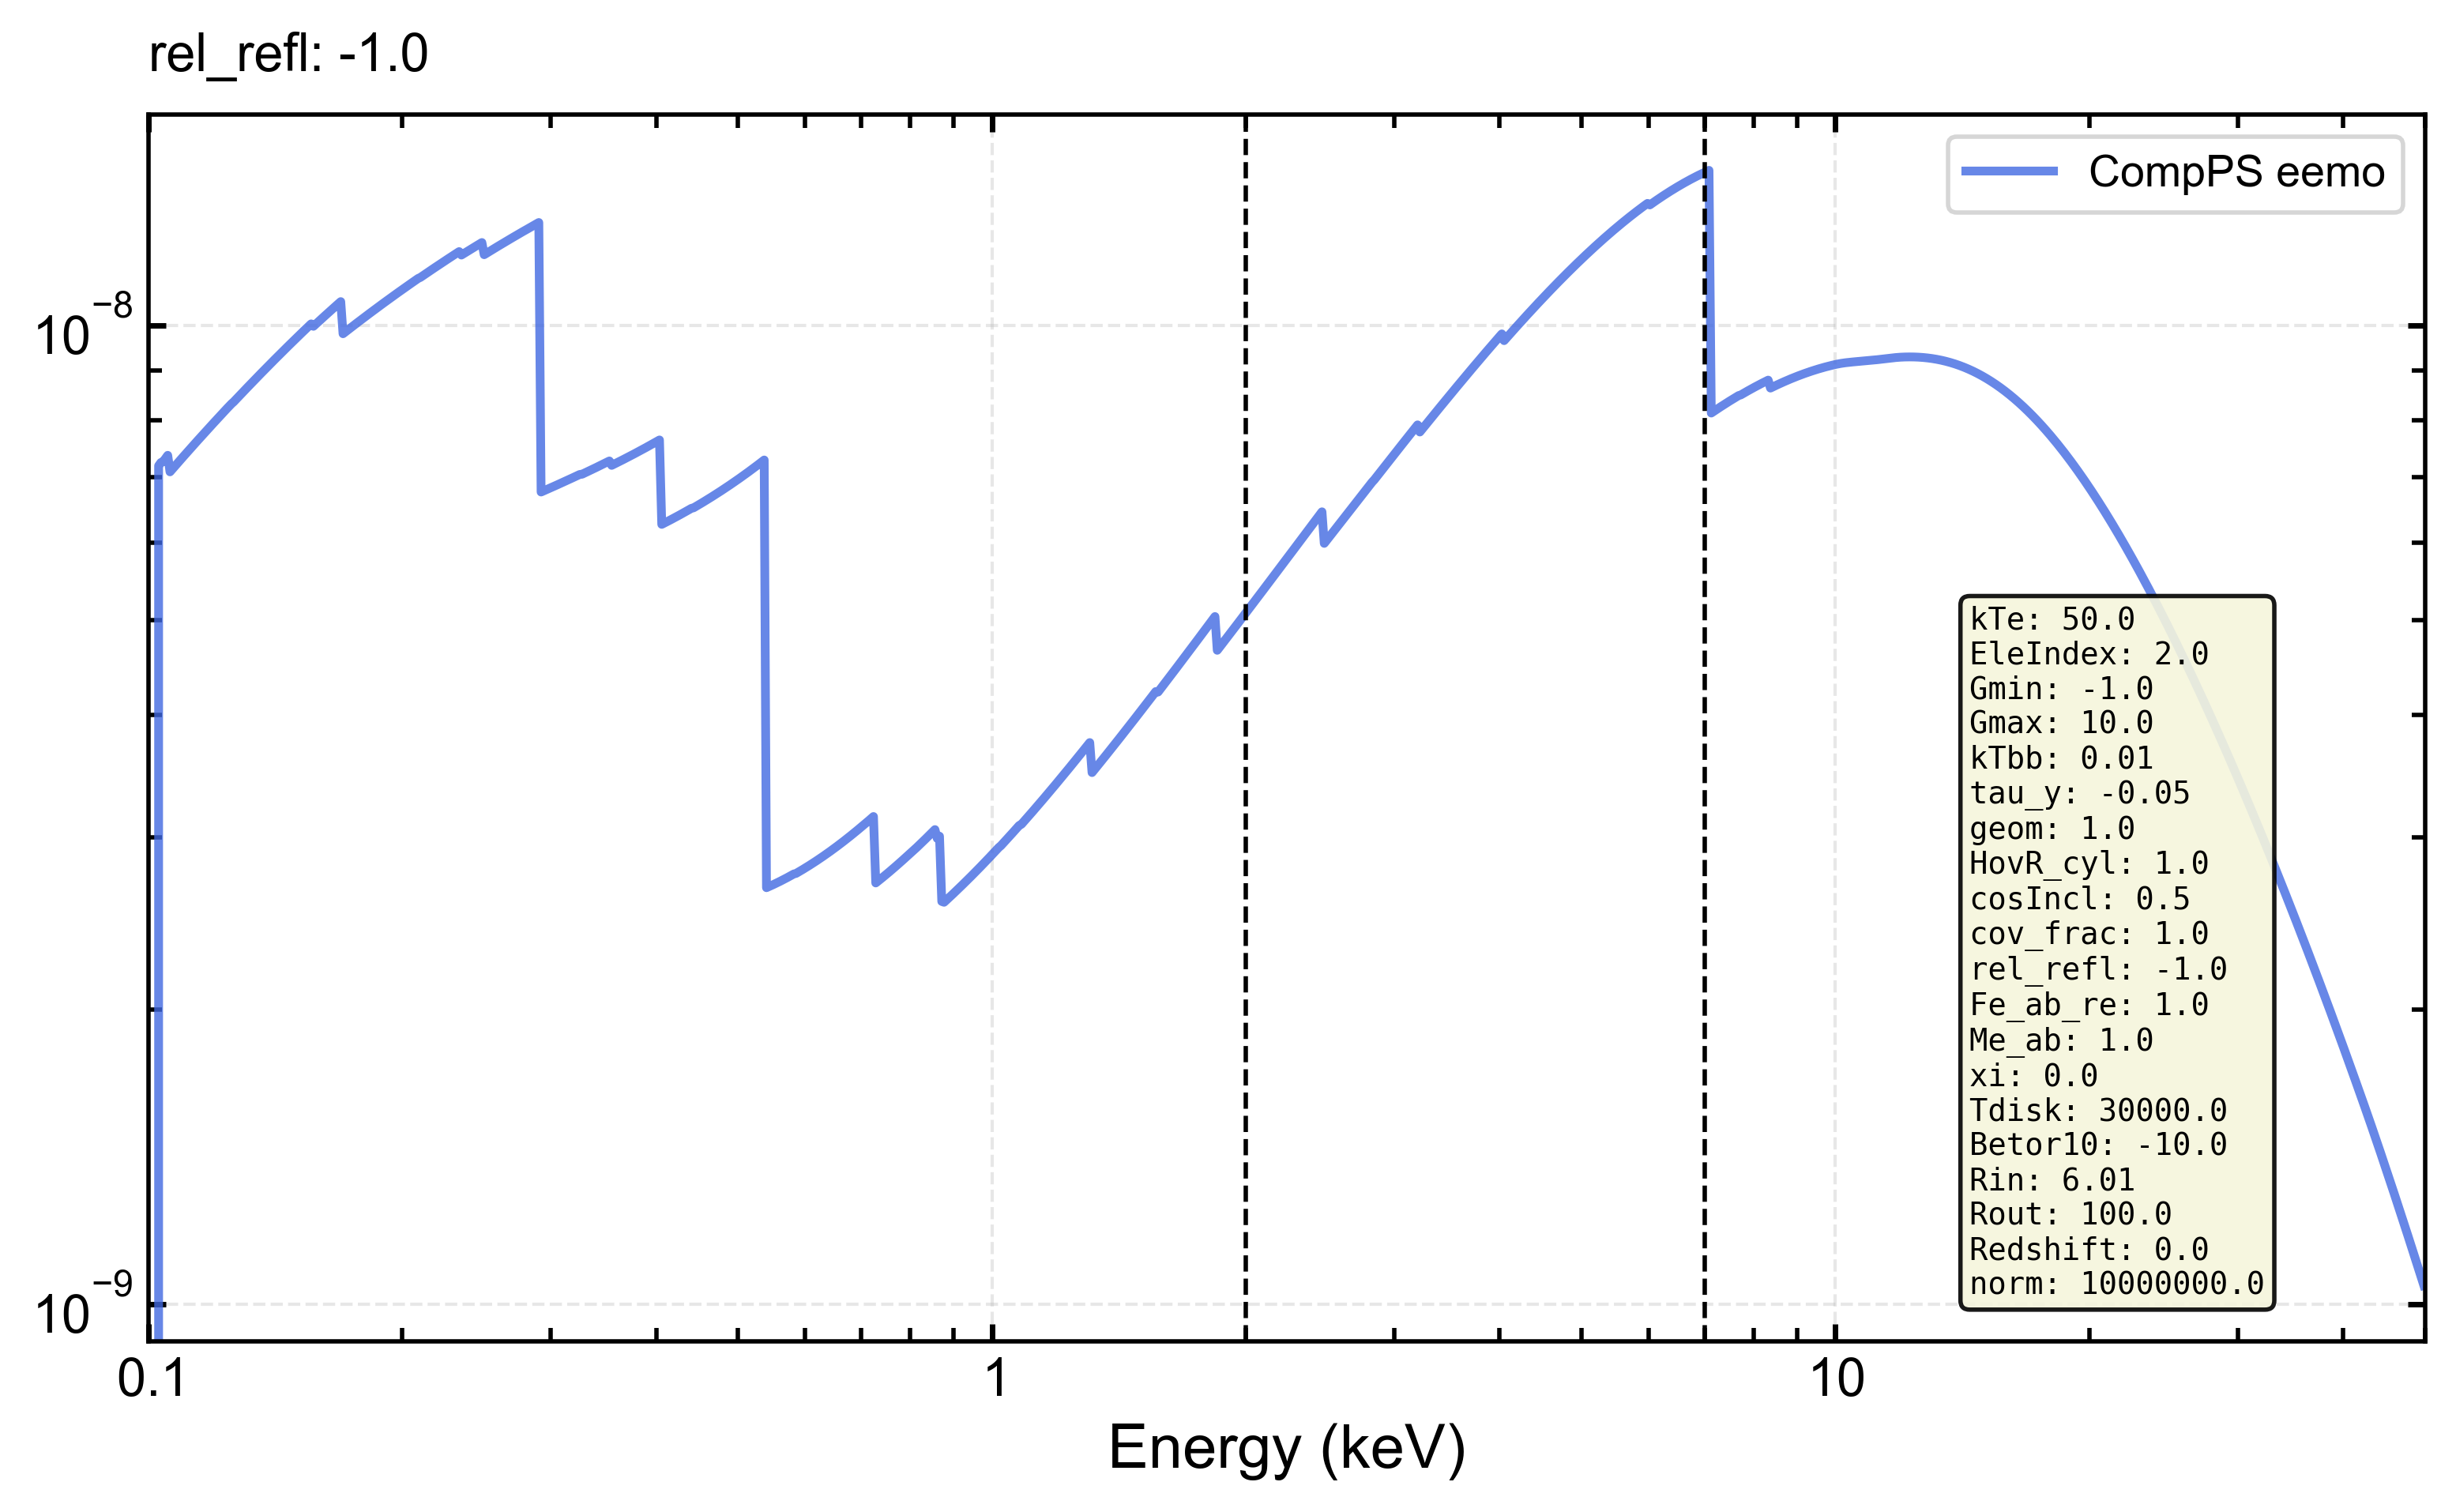

In [9]:
with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

    # Load the model from a saved file
    Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
    # Model('compPS')

    # Set the energy range and resolution for plotting
    AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

    # AllModels(1).compPS.geom = 1
    AllModels(1).compPS.kTbb = 0.01
    AllModels(1).compPS.kTe = 50
    AllModels(1).compPS.tau_y = [-0.05, 0.1, -10, -8, 8, 10]
    AllModels(1).compPS.rel_refl = [-1, 0.01, -4.0, -3.0, 1000, 10000]

    # Generate the plot data with model components
    Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

    # Extract the energy grid, components, and total model flux
    en = list(map(float, Plot.x()))
    total = list(map(float, Plot.model()))  # Total model

    model = AllModels(1)

    # Extract parameter values and errors
    param_info = []
    for comp in model.componentNames:
        component = getattr(model, comp)
        for param_name in component.parameterNames:
            param = getattr(component, param_name)
            param_value = param.values[0]
            param_info.append(f'{param_name}: {param_value}')
            print(f'{param_name}: {param_value}')

    # Plotting using Matplotlib
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
    ax.axvline(2, color='k', ls='--')
    ax.axvline(7, color='k', ls='--')
    ax.grid(alpha=.3)

    ax.set_xlabel('Energy (keV)')
    ax.legend(fontsize=10)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.1, 50)

    # Add parameter values as a text box (better than a long title)
    param_text = '\n'.join(param_info)
    ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
            fontsize=7, verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
            family='monospace')

    rel_refl = AllModels(1).compPS.rel_refl.values[0]
    ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

    plt.tight_layout()
    plt.show()

In [3]:
import matplotlib.pyplot as plt
from src.utils import ChangeDir
from xspec import AllData, AllModels, Xset, Plot, Fit, Model
import numpy as np
from src import plot_settings
from typing import Any
plot_settings.set_mpl()
%config InlineBackend.figure_format='retina'


CompPS Version 4.00
Comptonization by Iterative Scattering Method
Poutanen & Svensson 1996
Questions: Juri Poutanen (juri.poutanen@oulu.fi)

Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re        

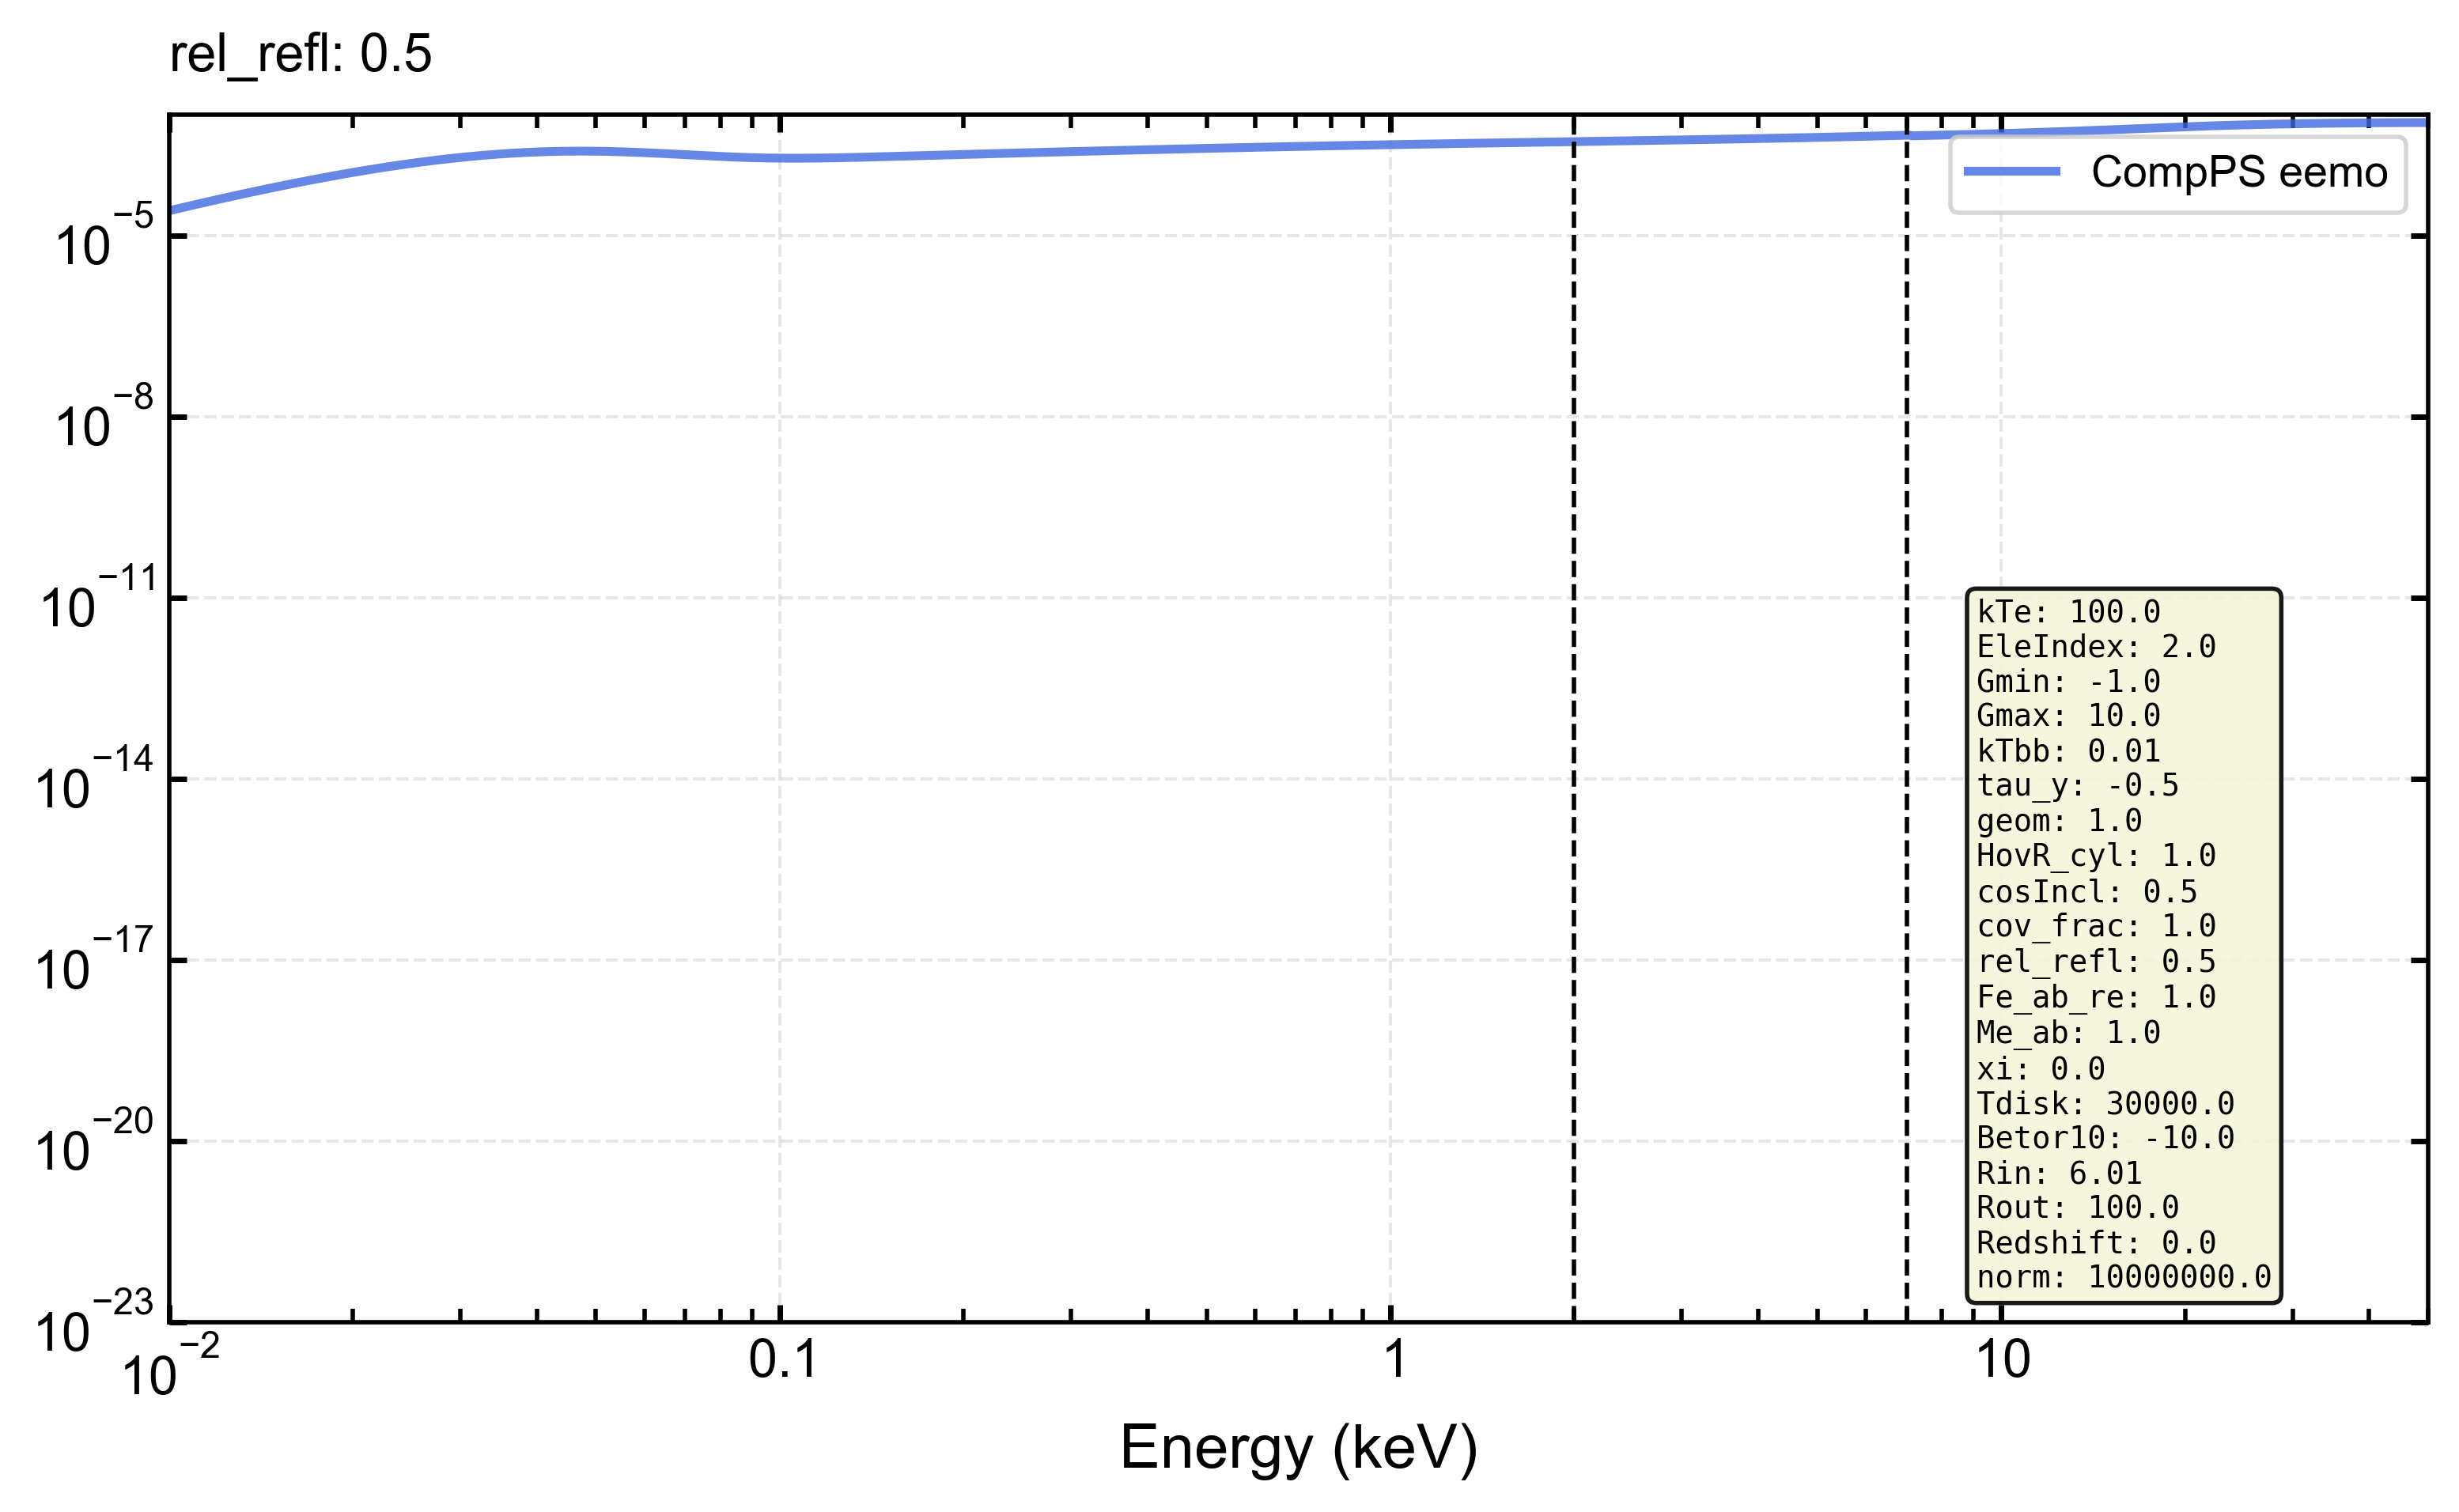

In [4]:

# with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.01 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [0.5, 0.01, -4.0, -3.0, 1000, 10000]

# Generate the plot data with model components
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

# Extract the energy grid, components, and total model flux
en = list(map(float, Plot.x()))
total = list(map(float, Plot.model()))  # Total model


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                param_info.append(f'{param_name}: {param_value}')
                print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.01, 50)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

rel_refl = AllModels(1).compPS.rel_refl.values[0]
ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

ax.set_ylim(1e-23, 1e-3)

plt.tight_layout()
plt.show()

***

Compton reflection from neutral medium.
See help for details.
If you use results of this model in a paper,
please refer to Magdziarz & Zdziarski 1995 MNRAS, 273, 837
Component names: ['compPS', 'pexrav', 'powerlaw', 'powerlaw_4']

Model compPS<1> + pexrav<2> + powerlaw<3> + powerlaw<4> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac    

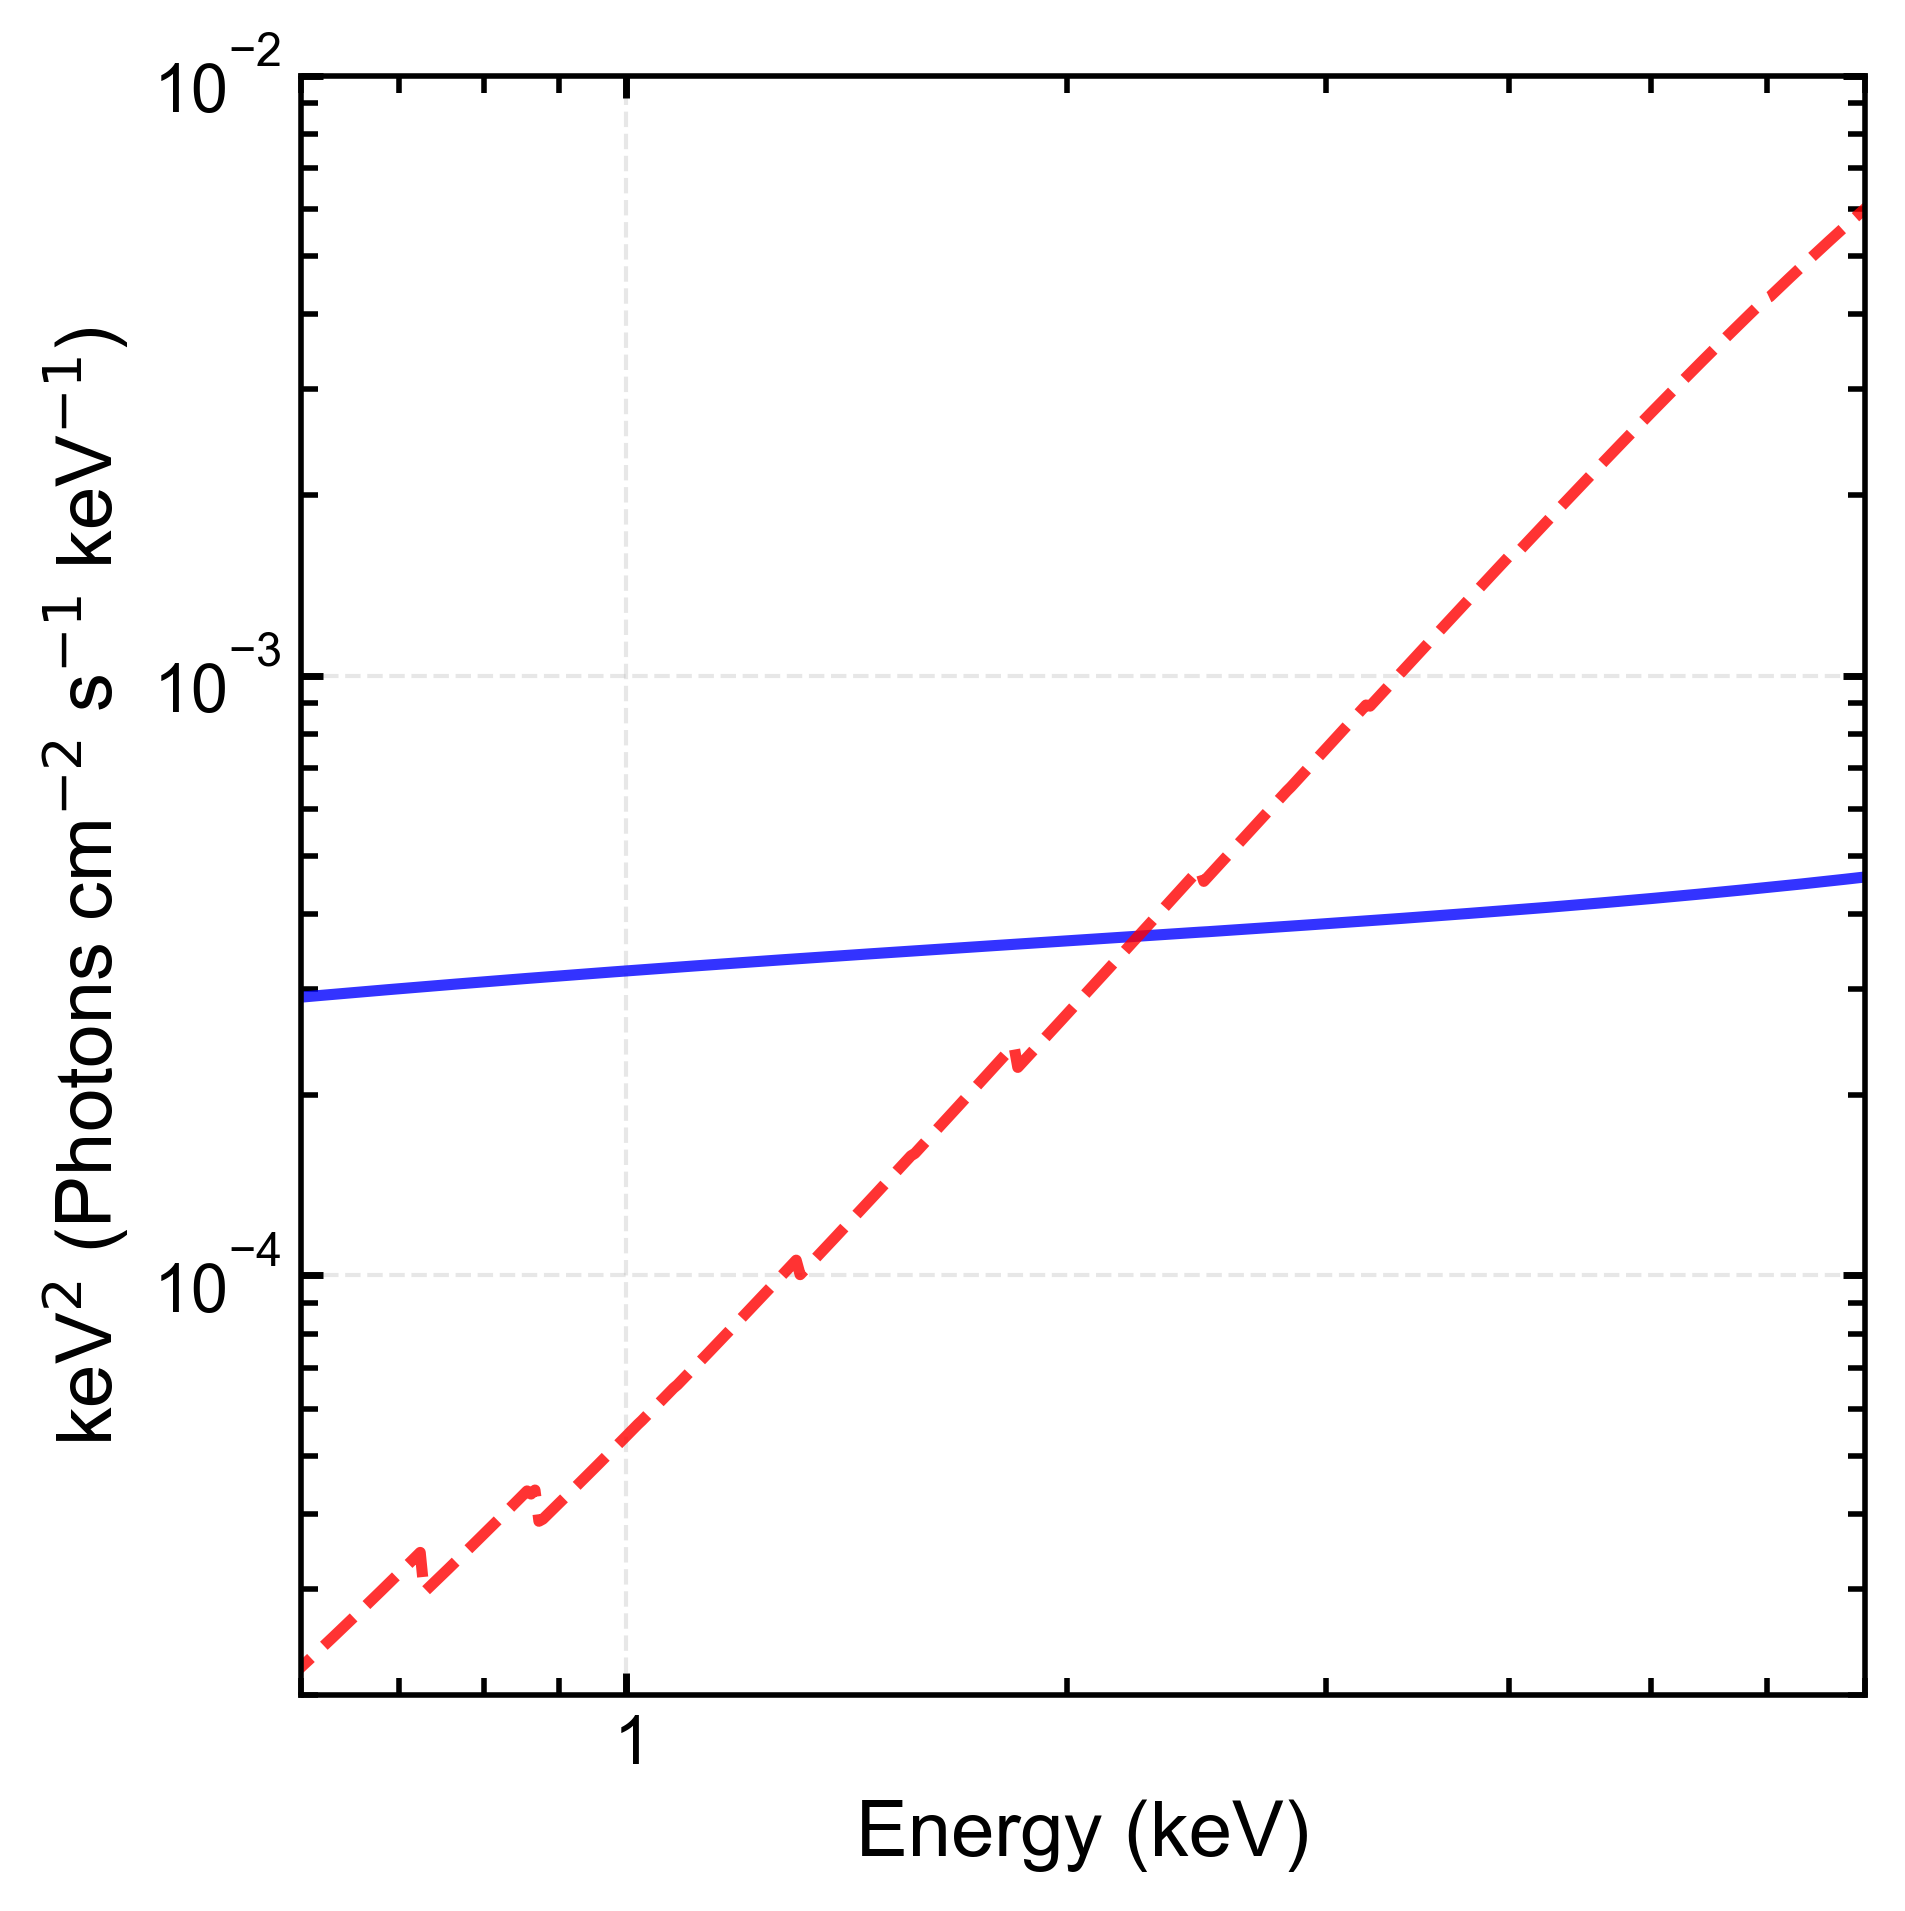

In [5]:
# Load the combined compPS + pexrav + powerlaw + powerlaw model
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS + pexrav + powerlaw + powerlaw')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

# Get the model components
model = AllModels(1)
compps = model.compPS
pexrav = model.pexrav

# Access powerlaw components
# Print component names to see how they're named
print("Component names:", model.componentNames)

# In PyXspec with multiple powerlaw instances, access them by component index
# Components: 1=compPS, 2=pexrav, 3=powerlaw, 4=powerlaw
# Access using AllModels component indexing (0-indexed for Python, but XSPEC uses 1-indexed)
# We'll access them through the component list
comp_names = list(model.componentNames)
powerlaw_indices = [i for i, name in enumerate(comp_names) if 'powerlaw' in name.lower()]

if len(powerlaw_indices) >= 2:
    powerlaw1 = getattr(model, comp_names[powerlaw_indices[0]])
    powerlaw2 = getattr(model, comp_names[powerlaw_indices[1]])
else:
    # Fallback: assume they're the 3rd and 4th components
    powerlaw1 = getattr(model, comp_names[2])
    powerlaw2 = getattr(model, comp_names[3])

# Set compPS parameters
compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 10000, 10000]
compps.rel_refl = 0.5

# Set pexrav parameters
pexrav.rel_refl = [-1, 0.1, -10, -10, 10, 10]
# pexrav.rel_refl = 100
pexrav.Redshift = 0.0
pexrav.cosIncl = 0.5  # Cosine of inclination (matches compPS)
pexrav.norm = 0.05

# Set powerlaw 1 parameters
powerlaw1.PhoIndex = 1.8
powerlaw1.PhoIndex.frozen = True
powerlaw1.norm = 2.0e-4

# Set powerlaw 2 parameters
powerlaw2.PhoIndex = 0
powerlaw2.PhoIndex.frozen = True
powerlaw2.norm = 7.0e-5

# Generate the plot data and extract energy grid
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)
en = list(map(float, Plot.x()))

# Extract total model
total = list(map(float, Plot.model()))  # Total model (compPS + pexrav + powerlaw1 + powerlaw2)

# Extract compPS component by temporarily zeroing pexrav and powerlaws
pexrav_norm_save = pexrav.norm.values[0]
powerlaw1_norm_save = powerlaw1.norm.values[0]
powerlaw2_norm_save = powerlaw2.norm.values[0]
pexrav.norm = 0.0
powerlaw1.norm = 0.0
powerlaw2.norm = 0.0
Plot("eemo")
compPS_component = list(map(float, Plot.model()))
pexrav.norm = pexrav_norm_save  # Restore pexrav norm
powerlaw1.norm = powerlaw1_norm_save  # Restore powerlaw1 norm
powerlaw2.norm = powerlaw2_norm_save  # Restore powerlaw2 norm

# Extract pexrav component by temporarily zeroing compPS and powerlaws
compps_norm_save = compps.norm.values[0]
powerlaw1_norm_save = powerlaw1.norm.values[0]
powerlaw2_norm_save = powerlaw2.norm.values[0]
compps.norm = 0.0
powerlaw1.norm = 0.0
powerlaw2.norm = 0.0
Plot("eemo")
pexrav_component = list(map(float, Plot.model()))
compps.norm = compps_norm_save  # Restore compPS norm
powerlaw1.norm = powerlaw1_norm_save  # Restore powerlaw1 norm
powerlaw2.norm = powerlaw2_norm_save  # Restore powerlaw2 norm

# Extract powerlaw1 component by temporarily zeroing all others
compps_norm_save = compps.norm.values[0]
pexrav_norm_save = pexrav.norm.values[0]
powerlaw2_norm_save = powerlaw2.norm.values[0]
compps.norm = 0.0
pexrav.norm = 0.0
powerlaw2.norm = 0.0
Plot("eemo")
powerlaw1_component = list(map(float, Plot.model()))
compps.norm = compps_norm_save  # Restore compPS norm
pexrav.norm = pexrav_norm_save  # Restore pexrav norm
powerlaw2.norm = powerlaw2_norm_save  # Restore powerlaw2 norm

# Extract powerlaw2 component by temporarily zeroing all others
compps_norm_save = compps.norm.values[0]
pexrav_norm_save = pexrav.norm.values[0]
powerlaw1_norm_save = powerlaw1.norm.values[0]
compps.norm = 0.0
pexrav.norm = 0.0
powerlaw1.norm = 0.0
Plot("eemo")
powerlaw2_component = list(map(float, Plot.model()))
compps.norm = compps_norm_save  # Restore compPS norm
pexrav.norm = pexrav_norm_save  # Restore pexrav norm
powerlaw1.norm = powerlaw1_norm_save  # Restore powerlaw1 norm

# Restore total model for parameter extraction
Plot("eemo")

# Extract parameter values
param_info = []
for comp in model.componentNames:
        component = getattr(model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                if param_name != 'rel_refl':
                        param_info.append(f'{comp}.{param_name}: {param_value}')
                        print(f'{comp}.{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))

# # Plot total model
# ax.plot(
#     en, total,
#     label='Total (compPS + pexrav)',
#     alpha=0.9,
#     color='black',
#     lw=2.5,
#     ls='-'
# )

# Plot compPS component
ax.plot(
    en, compPS_component,
    label='compPS',
    alpha=0.8,
    color='blue',
    lw=2,
    ls='-'
)

# Plot pexrav component
ax.plot(
    en, pexrav_component,
    label='pexrav',
    alpha=0.8,
    color='red',
    lw=2,
    ls='--'
)

# # # Plot powerlaw1 component
# ax.plot(
#     en, powerlaw1_component,
#     label='powerlaw1 (PhoIndex=2.0)',
#     alpha=0.8,
#     color='green',
#     lw=2,
#     ls=':'
# )

# # Plot powerlaw2 component
# ax.plot(
#     en, powerlaw2_component,
#     label='powerlaw2 (PhoIndex=1.0)',
#     alpha=0.8,
#     color='orange',
#     lw=2,
#     ls='-.'
# )



ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
# ax.legend(
#         fontsize=12, reverse=True, loc='upper left', title='Models',
#         title_fontsize=12
#         )
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.6, 7)
ax.set_ylim(2e-5, 1e-2)

ax.set_ylabel(
    'keV$^{2}$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=14
    )

# Add parameter values as a text box (better than a long title)
# param_text = '\n'.join(param_info)
# ax.text(0.8, 0.8, param_text, transform=ax.transAxes,
#         fontsize=7, verticalalignment='top', horizontalalignment='left',
#         bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
#         family='monospace')

# ax.set_title(f'compPS + pexrav model components', fontsize=12, pad=10, loc='left')
# ax.set_title(f'tau_y = {compps.tau_y.values[0]}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()


Model bbody<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   bbody      kT         keV      3.00000      +/-  0.0          
   2    1   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Models will now use energy array created from:
   0.01 - 50   1000 log bins



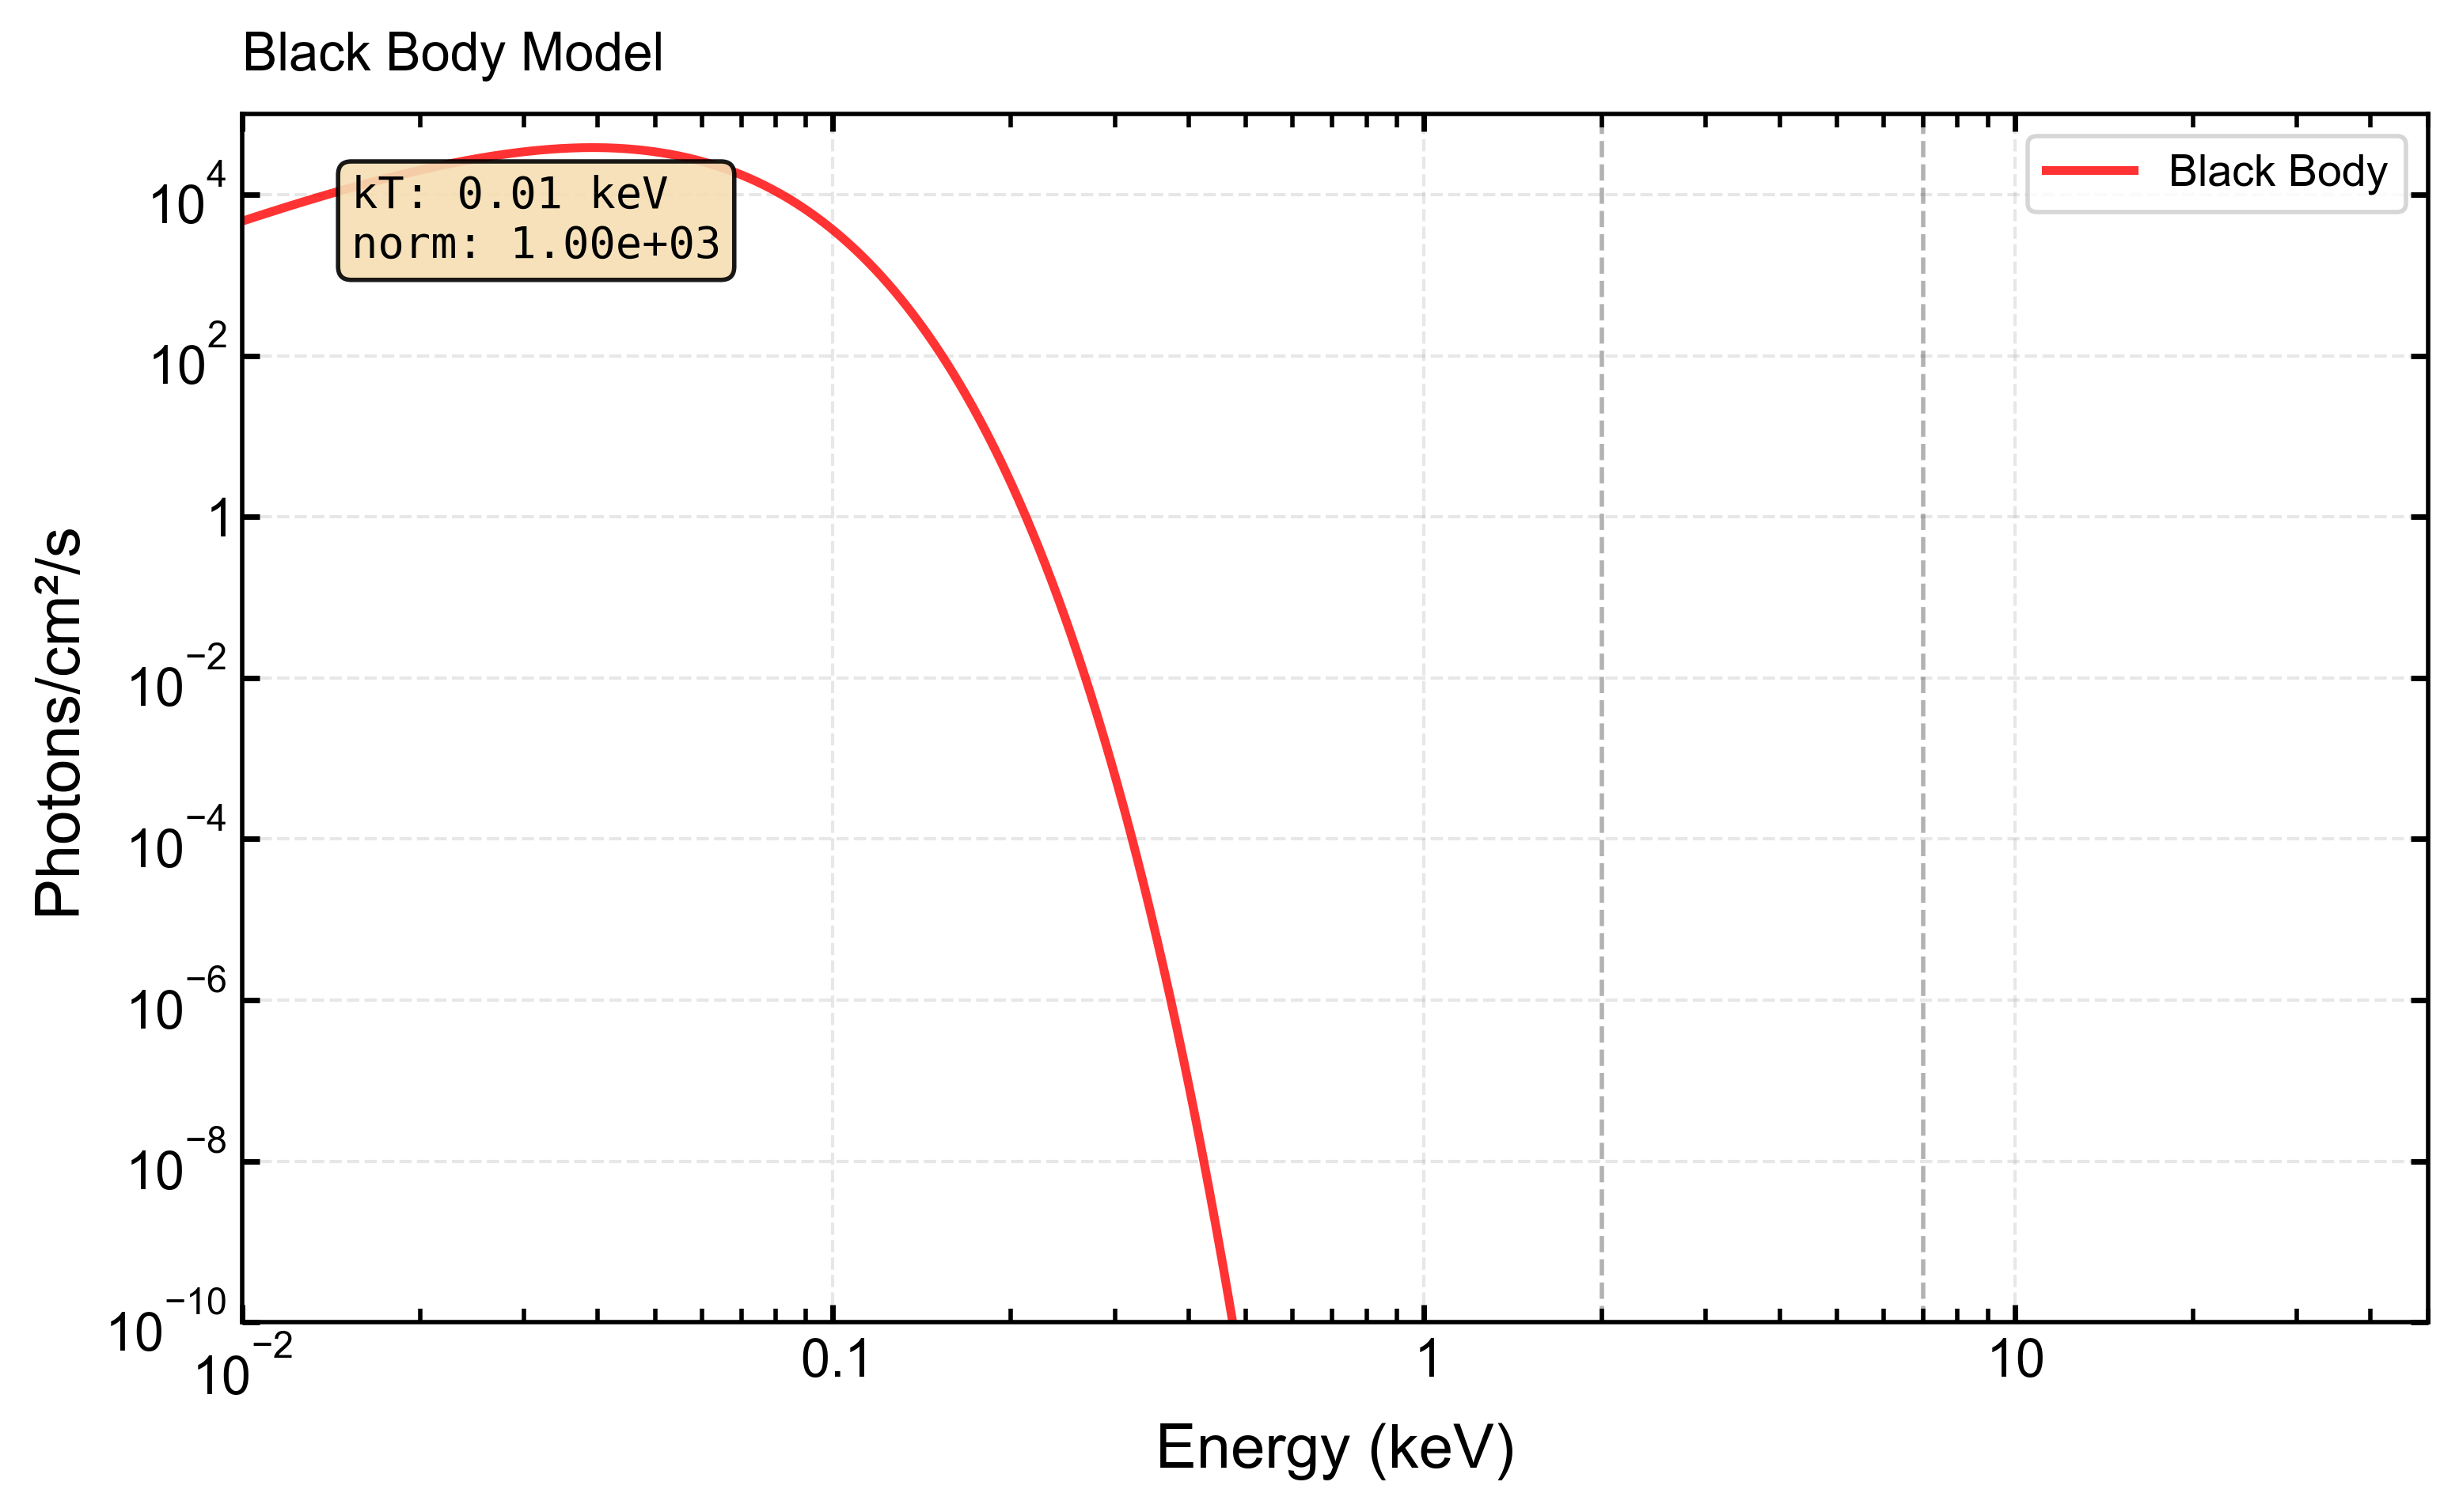

In [6]:
# Create a separate Black Body model
AllModels.clear()
Model('bbody')

# Set the energy range for plotting
AllModels.setEnergies('0.01 50 1000 log')

# Get the black body component
bb = AllModels(1).bbody

# Set black body parameters
# kT is in keV, norm is the normalization
bb.kT = 1e-2  # Temperature in keV
bb.norm = 1e3  # Normalization

# Generate the plot data
Plot("eemo")

# Extract energy and flux
en_bb = list(map(float, Plot.x()))
flux_bb = list(map(float, Plot.model()))

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(en_bb, flux_bb, label='Black Body', alpha=.8, color='red', lw=2, ls='-')
ax.axvline(2, color='k', ls='--', alpha=0.3)
ax.axvline(7, color='k', ls='--', alpha=0.3)
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Photons/cm²/s')
ax.legend(fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.01, 50)
ax.set_ylim(1e-10, 1e5)

# Add parameter info
param_text = f'kT: {bb.kT.values[0]} keV\nnorm: {bb.norm.values[0]:.2e}'
ax.text(0.05, 0.95, param_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9),
        family='monospace')

ax.set_title('Black Body Model', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()


Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       

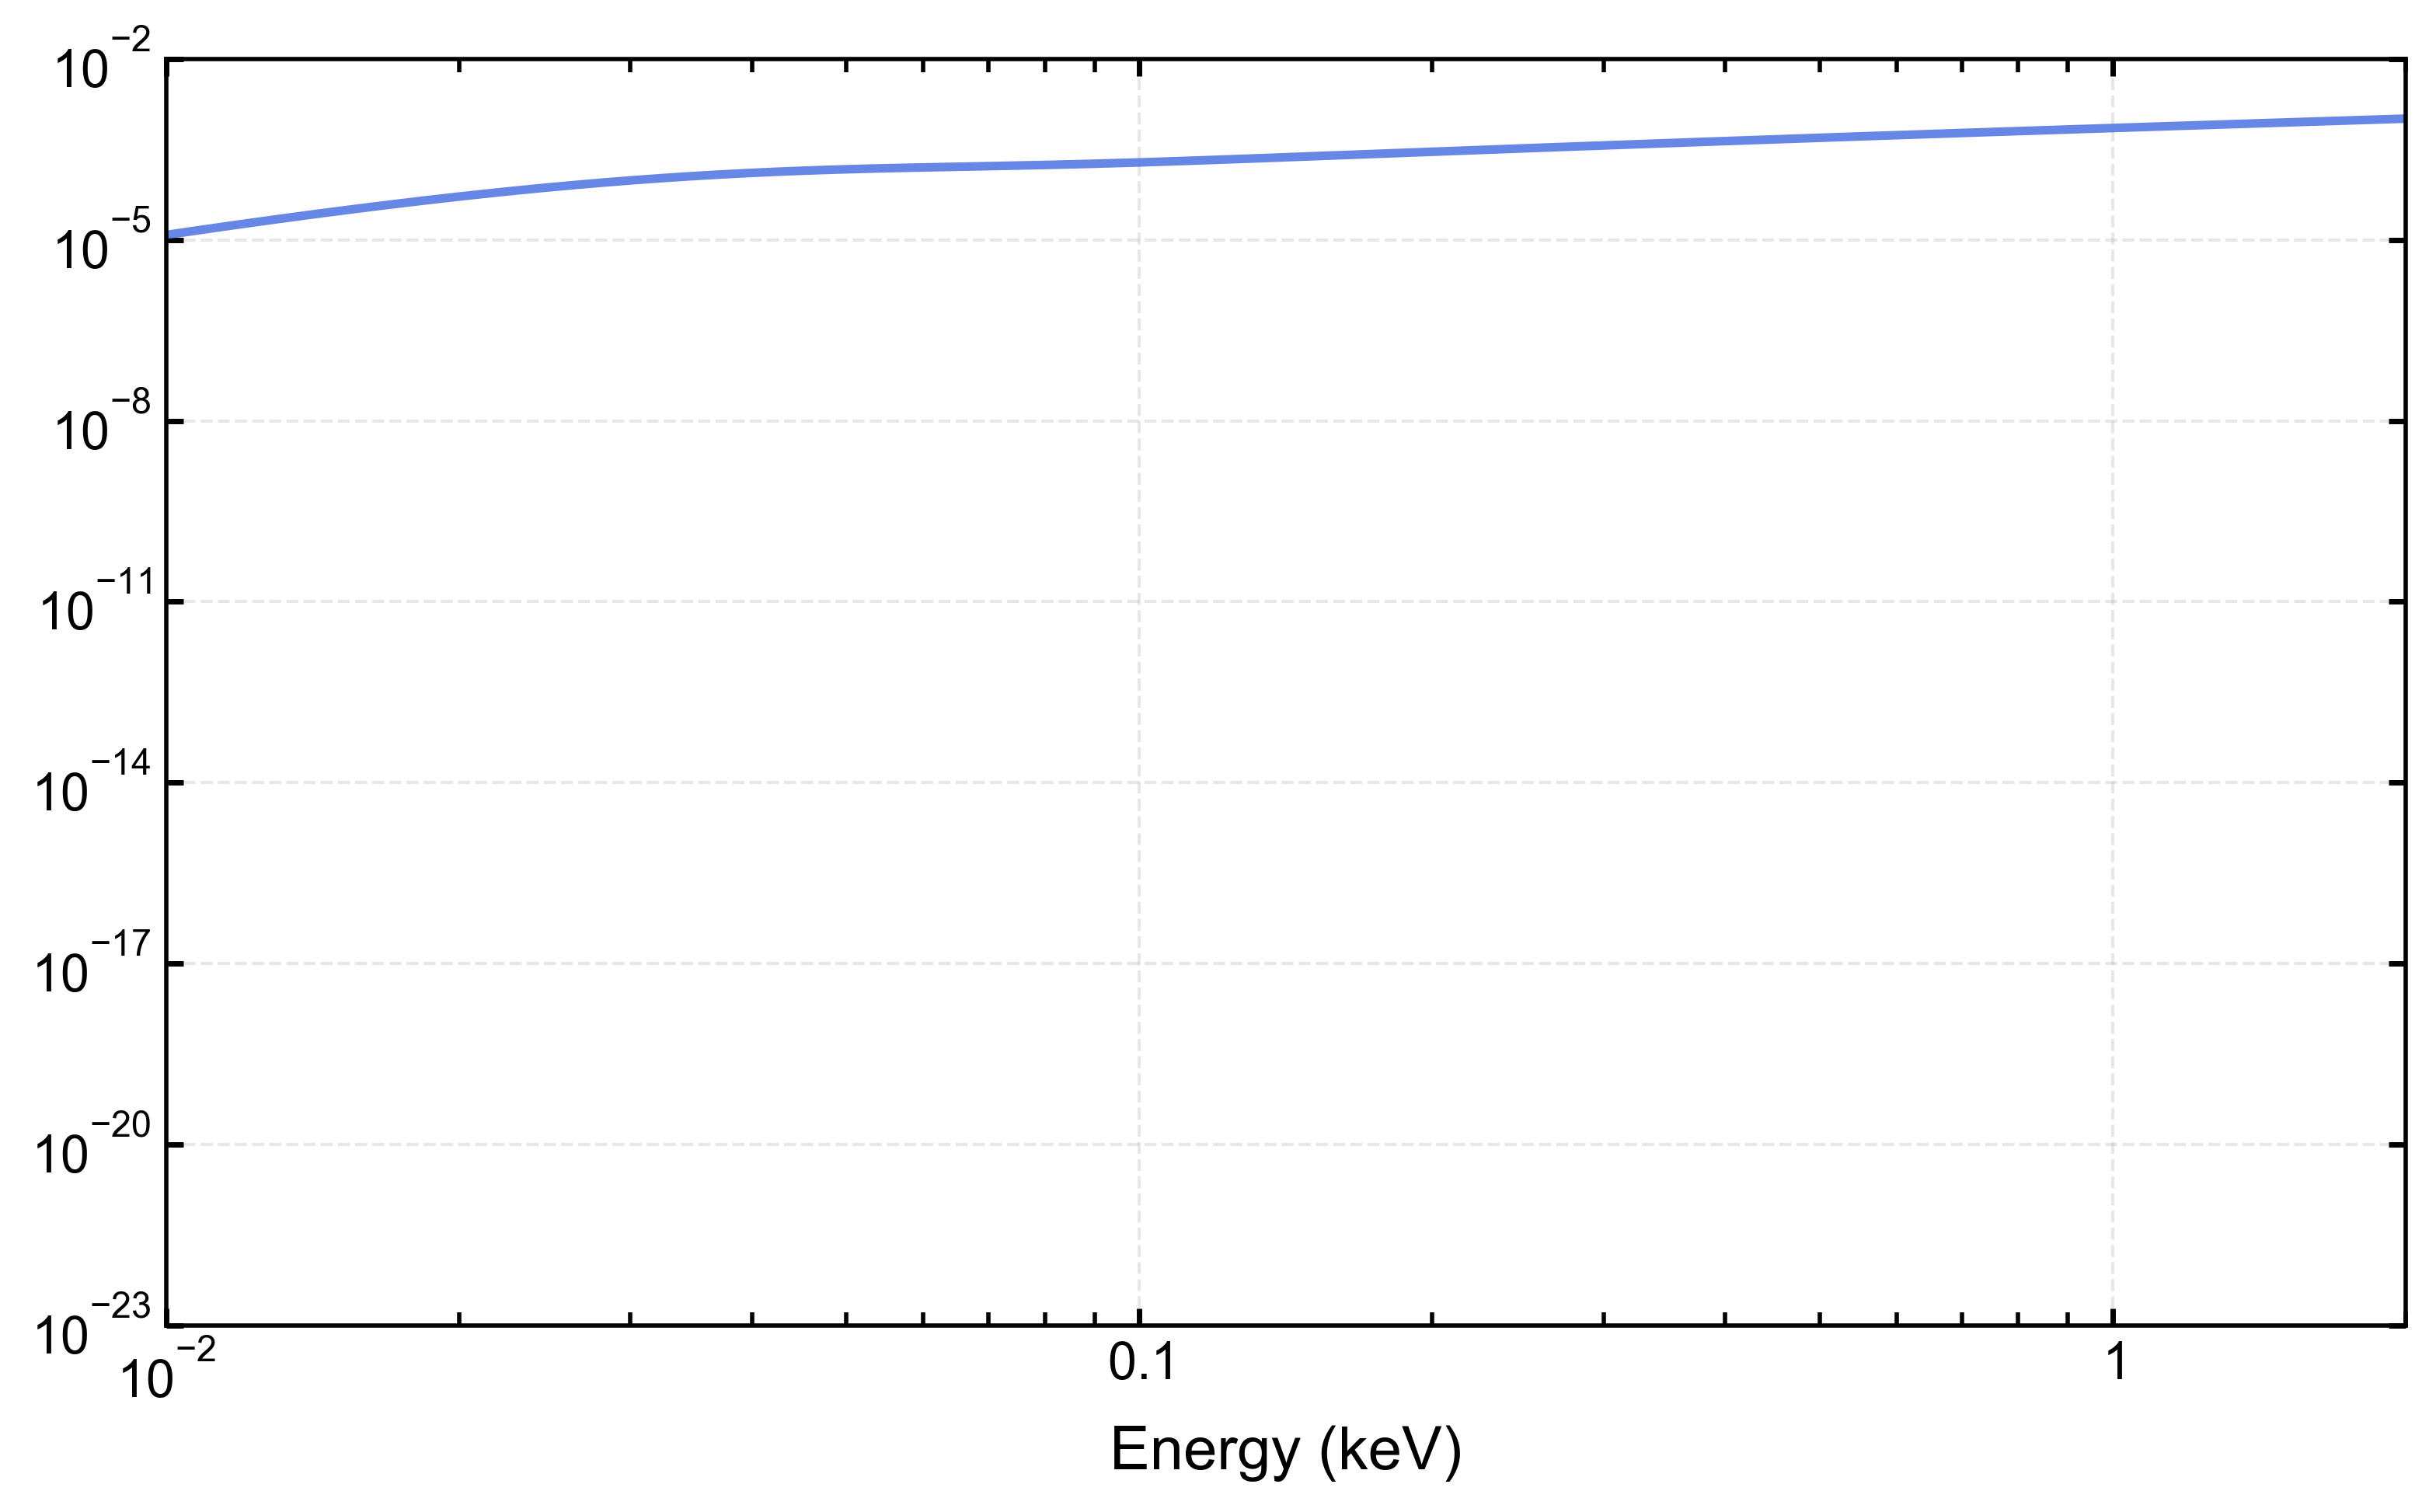

In [35]:
# with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
AllModels.clear()
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.001 1001 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-1, 0.1, -10, -8, 8, 10]
compps.rel_refl = [0, 0.01, -4.0, -3.0, 1000, 10000]

# Generate the plot data with model components
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

# Extract the energy grid, components, and total model flux
en = list(map(float, Plot.x()))
total = list(map(float, Plot.model()))  # Total model


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                param_info.append(f'{param_name}: {param_value}')
                print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
# ax.axvline(2, color='k', ls='--')
# ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.01, 50)

# # Add parameter values as a text box (better than a long title)
# param_text = '\n'.join(param_info)
# ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
#         fontsize=7, verticalalignment='top', horizontalalignment='left',
#         bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
#         family='monospace')

rel_refl = AllModels(1).compPS.rel_refl.values[0]
# ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

# # Create a separate Black Body model
# AllModels.clear()
# Model('bbody')

# # Set the energy range for plotting
# AllModels.setEnergies('0.01 50 1000 log')

# # Get the black body component
# bb = AllModels(1).bbody

# # Set black body parameters
# # kT is in keV, norm is the normalization
# bb.kT = 1e-2  # Temperature in keV
# bb.norm = 0.1e-4  # Normalization

# # Generate the plot data
# Plot("eemo")

# # Extract energy and flux
# en_bb = list(map(float, Plot.x()))
# flux_bb = list(map(float, Plot.model()))
# ax.plot(en_bb, flux_bb, label='Black Body', alpha=.8, color='red', lw=2, ls='-')

# ax.legend(fontsize=10)

# ax.set_ylabel('keV$^{2}$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)')


plt.tight_layout()
ax.set_ylim(1e-23, 1e-2)
ax.set_xlim(1e-2, 2)
plt.show()

In [36]:
import xspec

In [37]:
AllModels(1).show()


Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                10.0000      frozen
   5    1   compPS     kTbb       keV      1.00000E-02  frozen
   6    1   compPS     tau_y               -1.00000     +/-  0.0          
   7    1   compPS     geom                1.00000      frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          +/-  0.0          
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                

In [38]:
def compute_amplification_factor(
    model,
    seed_tau_y: float = -1e-20,
    energy_min: float = 0.001,
    energy_max: float = 1000.0
):
    """
    Compute Compton amplification factor A = flux_comptonized / flux_seed.

    Must be called after generate_fake_spectrum() while the CompPS model
    is still active. Temporarily sets tau_y to near-zero to isolate seed
    photons, then restores the original value.

    Uses AllModels(1).flux[0] (intrinsic model flux) rather than
    AllData(1).flux[0] (convolved instrument flux).

    Parameters
    ----------
    model : xspec.Model
        The active CompPS model.
    seed_tau_y : float
        tau_y for the seed-photon run. Negative = Compton y-parameter mode
        with effectively zero scattering (default: -1e-20).
    energy_min : float
        Lower bound of flux integration in keV (default: 0.001).
    energy_max : float
        Upper bound of flux integration in keV (default: 1000.0).

    Returns
    -------
    float or None
        Amplification factor A, or None if computation fails.
    """
    energy_str = f"{energy_min} {energy_max}"
    original_tau_y = None
    tau_y_param = None
    try:
        # Comptonized flux (full model, current tau_y)
        xspec.AllModels.calcFlux(energy_str)
        flux_comptonized = xspec.AllModels(1).flux[0]

        # Save original tau_y
        tau_y_param = model.compPS.tau_y
        original_tau_y = tau_y_param.values[0]

        # Set near-zero tau_y → seed photons only
        tau_y_param.values = [seed_tau_y, 0.01, -4.0, -3.0, 3.0, 4.0]

        # Seed flux
        xspec.AllModels.calcFlux(energy_str)
        flux_seed = xspec.AllModels(1).flux[0]

        # Restore original tau_y
        tau_y_param.values = [original_tau_y, 0.01, -4.0, -3.0, 3.0, 4.0]

        if flux_seed <= 0:
            return None
        return flux_comptonized / flux_seed

    except Exception:
        # Attempt restore even on failure
        if tau_y_param is not None and original_tau_y is not None:
            try:
                tau_y_param.values = [
                    original_tau_y, 0.01, -4.0, -3.0, 3.0, 4.0
                ]
            except Exception:
                pass
        return None

In [39]:
# compps_model = xspec.Model("compps")

compute_amplification_factor(model=AllModels(1))

 Model Flux  0.010784 photons (4.7848e-11 ergs/cm^2/s) range (0.0010000 - 1000.0 keV)


44.4600694907362

 Model Flux  0.024818 photons (1.0762e-12 ergs/cm^2/s) range (0.0010000 - 1000.0 keV)


In [44]:
from xspec import AllData, AllModels, Model, Plot
import numpy as np

# ── Parameters to test ──────────────────────────────────────────────────────
kTe      = 100.0
tau_y    = -0.7       # y-parameter mode (negative), change this to test different points
kTbb     = 0.01       # seed photon temperature [keV], peak at ~3*kTbb = 0.03 keV
seed_tau = -1e-20     # near-zero → seed photons only
norm     = 1.0

energy_min, energy_max = 0.001, 1000.0
energy_str = f"{energy_min} {energy_max}"

# ── Setup model ──────────────────────────────────────────────────────────────
AllData.clear()
AllModels.clear()
Model('compPS')

compps = AllModels(1).compPS
compps.kTe      = kTe
compps.EleIndex = 2.0
compps.Gmin     = -1.0
compps.Gmax     = 10.0
compps.kTbb     = kTbb
compps.tau_y    = [tau_y, 0.01, -4.0, -3.0, 3.0, 4.0]
compps.geom     = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl  = 0.5
compps.cov_frac = 1.0
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 1000, 10000]
compps.Fe_ab_re = 1.0
compps.Me_ab    = 1.0
compps.xi       = 0.0
compps.Tdisk    = 30000.0
compps.Betor10  = -10.0
compps.Rin      = 6.01
compps.Rout     = 100.0
compps.Redshift = 0.0
compps.norm     = norm

print(f"tau_y = {tau_y},  kTbb = {kTbb} keV,  kTe = {kTe} keV")
print()


# ── Method 2: calcFlux with FINE energy grid (setEnergies) ──────────────────
AllModels.setEnergies("0.001 1000 5000 log")

AllModels.calcFlux(energy_str)
flux_comp_fine = AllModels(1).flux[0]

compps.tau_y = [seed_tau, 0.01, -4.0, -3.0, 3.0, 4.0]
AllModels.calcFlux(energy_str)
flux_seed_fine = AllModels(1).flux[0]
compps.tau_y = [tau_y, 0.01, -4.0, -3.0, 3.0, 4.0]

A_fine = flux_comp_fine / flux_seed_fine if flux_seed_fine > 0 else None
print(f"[Fine grid]     flux_comp={flux_comp_fine:.4e}  flux_seed={flux_seed_fine:.4e}  A={A_fine}")

# ── Method 3: Manual integration using Plot.model() (what the notebook uses) ─
AllModels.setEnergies("0.001 1000 5000 log")

Plot.xAxis = "keV"
Plot("eemo")  # E*E*model, no data

en   = np.array(list(map(float, Plot.x())))    # bin centres [keV]
widths = np.diff(np.log(en))                   # log-spaced bin widths (approx)

# Convert eemo (keV^2 * phot/cm^2/s/keV) back to erg/cm^2/s per bin:
# eemo = E^2 * N(E), so N(E) = eemo/E^2; flux_erg = N(E)*E*keV_to_erg * dE
keV_to_erg = 1.602e-9
model_eemo = np.array(list(map(float, Plot.model())))  # keV^2 * phot/cm^2/s/keV
# flux in erg/cm^2/s = (model_eemo / E) * E_keV * keV_to_erg * dE
# but dE for log-spaced: dE_i ≈ E_i * d(lnE)
dE = en * np.concatenate([widths, [widths[-1]]])
flux_erg_comp = np.sum((model_eemo / en) * en * keV_to_erg * dE)

compps.tau_y = [seed_tau, 0.01, -4.0, -3.0, 3.0, 4.0]
Plot("eemo")
model_eemo_seed = np.array(list(map(float, Plot.model())))
flux_erg_seed = np.sum((model_eemo_seed / en) * en * keV_to_erg * dE)
compps.tau_y = [tau_y, 0.01, -4.0, -3.0, 3.0, 4.0]

A_plot = flux_erg_comp / flux_erg_seed if flux_erg_seed > 0 else None
print(f"[Plot method]   flux_comp={flux_erg_comp:.4e}  flux_seed={flux_erg_seed:.4e}  A={A_plot}")

AllModels.setEnergies("reset")
print()
print(f"Ratio fine/default for flux_seed: {flux_seed_fine/flux_seed_default:.2f}x  (shows grid effect on seed)")



Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       